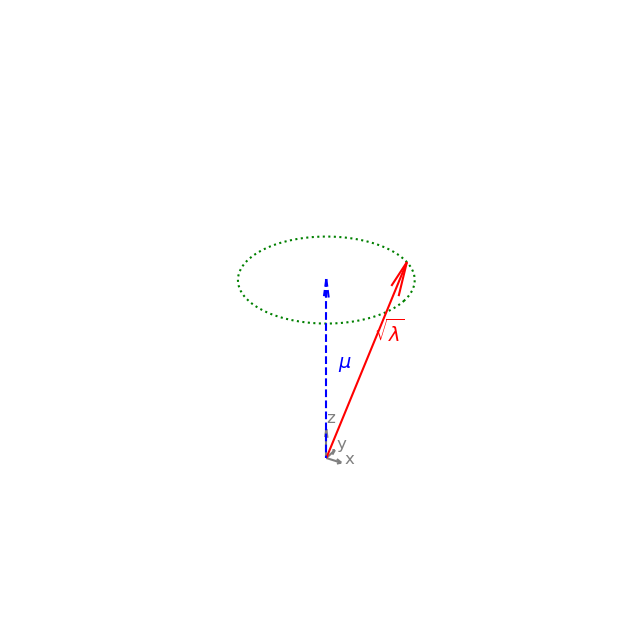

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the aspect ratio to 'equal' for better visualization
ax.set_box_aspect([1,1,1])

# Define the components of the angular momentum vector L
Lx = 3
Ly = 4
Lz = 6

# The origin of the vectors
origin = [0, 0, 0]

# Plot the angular momentum vector L
ax.quiver(*origin, Lx, Ly, Lz, color='red', label=r'$\vec{L}$', arrow_length_ratio=0.15)

# Plot the z-component vector Lz
ax.quiver(*origin, 0, 0, Lz, color='blue', linestyle='--', arrow_length_ratio=0.1)

# Plot the x, y, and z unit vectors
ax.quiver(*origin, 1, 0, 0, color='gray', arrow_length_ratio=0.3)
ax.quiver(*origin, 0, 1, 0, color='gray', arrow_length_ratio=0.3)
ax.quiver(*origin, 0, 0, 1, color='gray', arrow_length_ratio=0.3)

# Add labels for the unit vectors
ax.text(1.2, 0, 0, 'x', color='gray', fontsize=12)
ax.text(0, 1.2, 0, 'y', color='gray', fontsize=12)
ax.text(0, 0, 1.2, 'z', color='gray', fontsize=12)

# Set title
# ax.set_title('Quantum Mechanical Angular Momentum Vector', fontsize=16)

# Plot the circle of possible endpoints for the L vector
radius = np.sqrt(Lx**2 + Ly**2)
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)
z_circle = np.full_like(theta, Lz)
ax.plot(x_circle, y_circle, z_circle, color='green', linestyle=':', label='Uncertainty Circle')

# Add annotations for vector lengths, adjusted for better visibility
lambda_val = Lx**2 + Ly**2 + Lz**2
mu_val = Lz
ax.text(Lx * 0.6, Ly * 0.6, Lz * 0.6, r'$\sqrt{\lambda}$', color='red', fontsize=14, horizontalalignment='left')
ax.text(0.5, 0.5, Lz * 0.5, r'$\mu$', color='blue', fontsize=14, horizontalalignment='left')

# Set the plot limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 10])

# Remove background planes and main axes lines, but keep the specific unit vectors
ax.set_axis_off()

# Remove grid
ax.grid(False)

# Save the plot
#plt.savefig('angular_momentum_final.png')

plt.show()

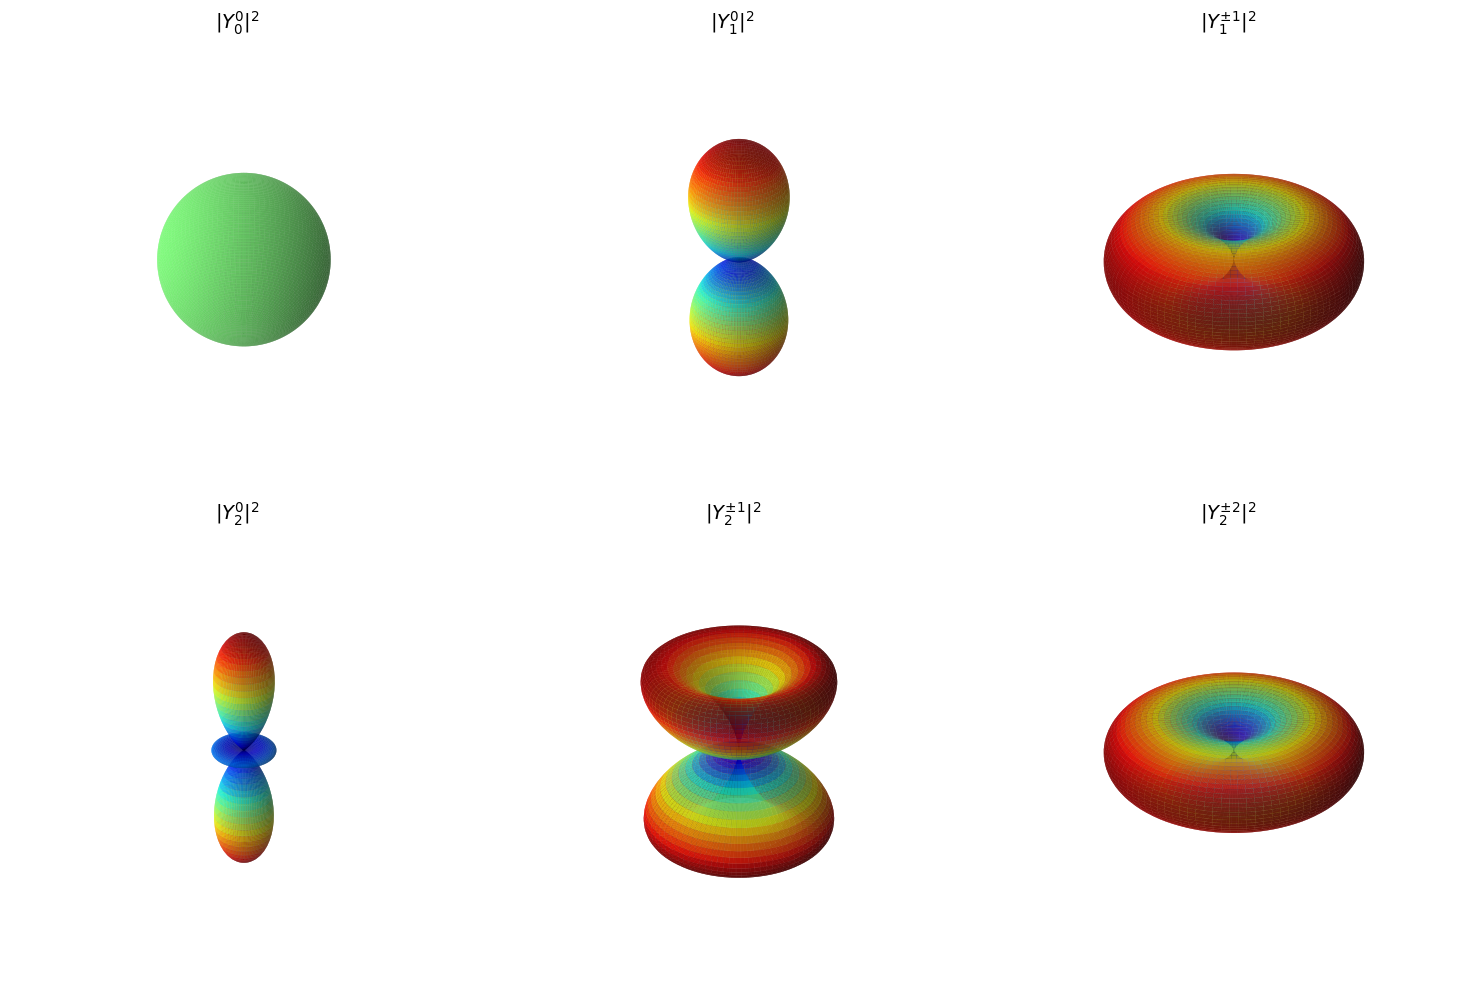

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def complex_spherical_harmonics_squared(l, m, theta, phi):
    """
    Calculates the absolute square of the normalized complex spherical harmonic Y_l^m(theta, phi).

    Args:
        l (int): The orbital quantum number.
        m (int): The magnetic quantum number.
        theta (numpy.ndarray): The polar angle (from 0 to pi).
        phi (numpy.ndarray): The azimuthal angle (from 0 to 2*pi).

    Returns:
        numpy.ndarray: The value of |Y_l^m(theta, phi)|^2.
    """
    if l == 0 and m == 0:
        return np.full_like(theta, 1.0 / (4.0 * np.pi))
    elif l == 1:
        if m == 0:
            return (3.0 / (4.0 * np.pi)) * np.cos(theta)**2
        elif abs(m) == 1:
            # The e^(i*phi) term squared has a magnitude of 1, so we only
            # need to square the sine term and the prefactor.
            return (3.0 / (8.0 * np.pi)) * np.sin(theta)**2
    elif l == 2:
        if m == 0:
            return (5.0 / (16.0 * np.pi)) * (3.0 * np.cos(theta)**2 - 1.0)**2
        elif abs(m) == 1:
            return (15.0 / (8.0 * np.pi)) * (np.sin(theta) * np.cos(theta))**2
        elif abs(m) == 2:
            return (15.0 / (32.0 * np.pi)) * np.sin(theta)**4
    else:
        # Return zeros for any other (l,m) pairs not explicitly handled.
        return np.zeros_like(theta)

# Set up the spherical coordinate grid
theta_phi_samples = 100
theta = np.linspace(0, np.pi, theta_phi_samples)
phi = np.linspace(0, 2 * np.pi, theta_phi_samples)
theta, phi = np.meshgrid(theta, phi)

# Define the (l, m) pairs to be plotted, avoiding redundant plots
# We only need to plot for m >= 0
lm_pairs = [
    (0, 0),
    (1, 0), (1, 1),
    (2, 0), (2, 1), (2, 2)
]

# Calculate the squared magnitude for all spherical harmonics and find the global maximum
all_R_values = []
for l, m in lm_pairs:
    R = complex_spherical_harmonics_squared(l, m, theta, phi)
    all_R_values.append(R)

# Find the global maximum to normalize all plots to the same scale
R_max = max(np.max(r) for r in all_R_values)

# Set up the plot with a grid of subplots (2 rows, 3 columns)
fig = plt.figure(figsize=(15, 10))

# Loop through the pairs and create a subplot for each
for i, (l, m) in enumerate(lm_pairs):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    # Set equal aspect ratio for the plot box
    ax.set_box_aspect([1, 1, 1])

    # Get the pre-calculated R and normalize it
    R = all_R_values[i] / np.max(all_R_values[i])#R_max
    if (l,m)==(0,0): R = R/1.5

    # Convert to Cartesian coordinates for plotting
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)

    # Normalize the R values for color mapping and apply alpha
    norm = plt.Normalize(vmin=R.min(), vmax=R.max())
    if (l,m)==(0,0): norm = plt.Normalize(vmin=R.min()-.1, vmax=R.max()+.1)
    colors = plt.cm.jet(norm(R))
    
    # Plot the surface with colors based on the radius and alpha set directly
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=colors,
                    edgecolor='none', alpha=0.8)
    
    # Plot the surface, with a solid, uniform color to better show shape
#    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
#                    edgecolor='none', alpha=0.8)
    
    
    # Manually set the axis limits to be identical across all plots
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    # Set titles for each subplot, using the pm symbol where appropriate
    if m == 0:
        title = r'$|Y_{' + str(l) + '}^0|^2$'
    else:
        title = r'$|Y_{' + str(l) + '}^{\pm ' + str(m) + '}|^2$'
    ax.set_title(title, fontsize=14)

    # Hide the axes to make the plot cleaner
    ax.set_axis_off()

plt.tight_layout()
plt.show()


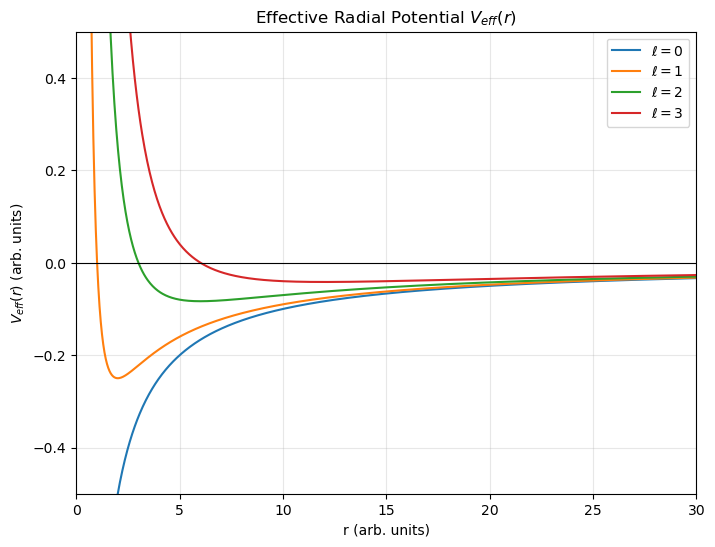

In [46]:
#| label: fig-efectivepot
#| fig-format: svg
#| fig-cap: Effective radial potential for different angular momenta.
#| fig-alt: Effective radial potential for different angular momenta.
import numpy as np
import matplotlib.pyplot as plt

# Parameters (scaled units: ħ = m = k = 1)
hbar = 1
m = 1
k = 1   # corresponds to e^2/(4πϵ0)

# Define radial coordinate
r = np.linspace(0.1, 30, 1000)  # avoid r=0 to prevent singularity

def V_eff(r, ell):
    centrifugal = hbar**2 * ell * (ell + 1) / (2 * m * r**2)
    coulomb = -k / r
    return coulomb + centrifugal

# Plot effective potentials for different l
ells = [0, 1, 2, 3]
plt.figure(figsize=(8,6))

for ell in ells:
    plt.plot(r, V_eff(r, ell), label=f"$\ell={ell}$")

plt.ylim(-0.5, 0.5)
plt.xlim(0, 30)
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Effective Radial Potential $V_{eff}(r)$")
plt.xlabel("r (arb. units)")
plt.ylabel("$V_{eff}(r)$ (arb. units)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


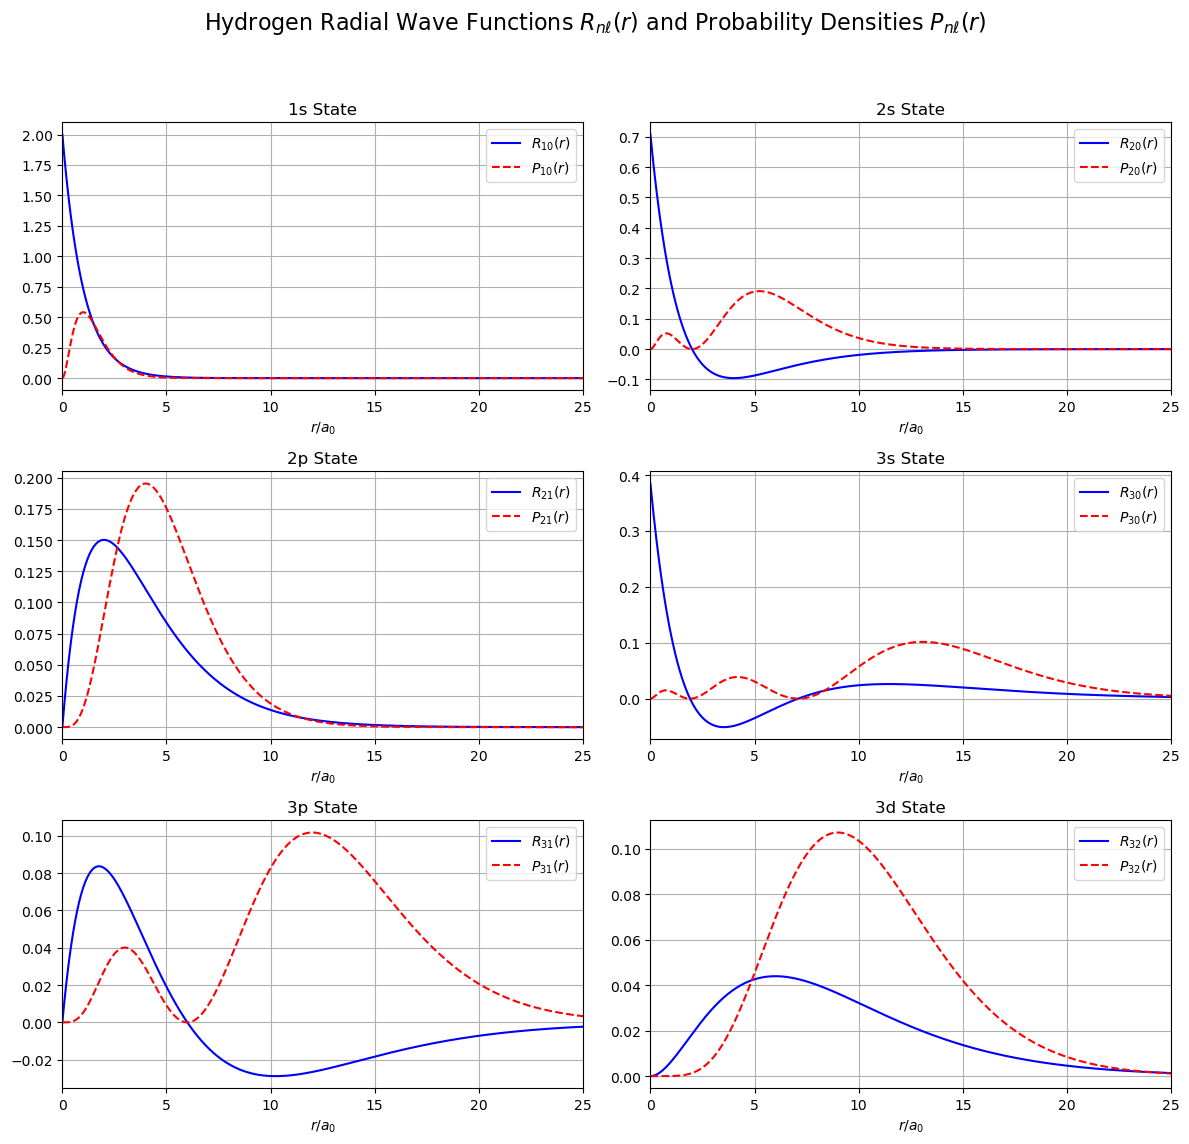

In [51]:
#| label: fig-radwf
#| fig-format: svg
#| fig-cap: Radial wave functions and probability densities for low $n$ states.
#| fig-alt: Radial wave functions and probability densities for low n states.
import numpy as np
import matplotlib.pyplot as plt

# Define the Bohr radius
a0 = 1.0

def R_10(r):
    """
    1s radial wavefunction.
    """
    return 2 * (a0**(-1.5)) * np.exp(-r / a0)

def R_20(r):
    """
    2s radial wavefunction.
    """
    return (1 / (2 * np.sqrt(2))) * (a0**(-1.5)) * (2 - r / a0) * np.exp(-r / (2 * a0))

def R_21(r):
    """
    2p radial wavefunction.
    """
    return (1 / (2 * np.sqrt(6))) * (a0**(-1.5)) * (r / a0) * np.exp(-r / (2 * a0))

def R_30(r):
    """
    3s radial wavefunction.
    """
    return (2 / (81 * np.sqrt(3))) * (a0**(-1.5)) * (27 - 18 * (r / a0) + 2 * (r / a0)**2) * np.exp(-r / (3 * a0))

def R_31(r):
    """
    3p radial wavefunction.
    """
    return (4 / (81 * np.sqrt(6))) * (a0**(-1.5)) * (6 - r / a0) * (r / a0) * np.exp(-r / (3 * a0))

def R_32(r):
    """
    3d radial wavefunction.
    """
    return (4 / (81 * np.sqrt(30))) * (a0**(-1.5)) * (r / a0)**2 * np.exp(-r / (3 * a0))

def P(R, r):
    """
    Calculates the radial probability density P(r) = r^2 * |R(r)|^2
    """
    return r**2 * np.abs(R)**2

# Create a range of r values
r_values = np.linspace(0, 25 * a0, 500)

# Set up the plot
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Hydrogen Radial Wave Functions $R_{n\ell}(r)$ and Probability Densities $P_{n\ell}(r)$", fontsize=16)

# Plot for 1s state
ax1 = axes[0, 0]
ax1.set_title("1s State")
ax1.plot(r_values, R_10(r_values), label='$R_{10}(r)$', color='blue')
ax1.plot(r_values, P(R_10(r_values), r_values), label='$P_{10}(r)$', color='red', linestyle='--')
ax1.set_xlabel('$r/a_0$')
ax1.set_xlim(0, 25)
ax1.legend()
ax1.grid(True)

# Plot for 2s state
ax2 = axes[0, 1]
ax2.set_title("2s State")
ax2.plot(r_values, R_20(r_values), label='$R_{20}(r)$', color='blue')
ax2.plot(r_values, P(R_20(r_values), r_values), label='$P_{20}(r)$', color='red', linestyle='--')
ax2.set_xlabel('$r/a_0$')
ax2.set_xlim(0, 25)
ax2.legend()
ax2.grid(True)

# Plot for 2p state
ax3 = axes[1, 0]
ax3.set_title("2p State")
ax3.plot(r_values, R_21(r_values), label='$R_{21}(r)$', color='blue')
ax3.plot(r_values, P(R_21(r_values), r_values), label='$P_{21}(r)$', color='red', linestyle='--')
ax3.set_xlabel('$r/a_0$')
ax3.set_xlim(0, 25)
ax3.legend()
ax3.grid(True)

# Plot for 3s state
ax4 = axes[1, 1]
ax4.set_title("3s State")
ax4.plot(r_values, R_30(r_values), label='$R_{30}(r)$', color='blue')
ax4.plot(r_values, P(R_30(r_values), r_values), label='$P_{30}(r)$', color='red', linestyle='--')
ax4.set_xlabel('$r/a_0$')
ax4.set_xlim(0, 25)
ax4.legend()
ax4.grid(True)

# Plot for 3p state
ax5 = axes[2, 0]
ax5.set_title("3p State")
ax5.plot(r_values, R_31(r_values), label='$R_{31}(r)$', color='blue')
ax5.plot(r_values, P(R_31(r_values), r_values), label='$P_{31}(r)$', color='red', linestyle='--')
ax5.set_xlabel('$r/a_0$')
ax5.set_xlim(0, 25)
ax5.legend()
ax5.grid(True)

# Plot for 3d state
ax6 = axes[2, 1]
ax6.set_title("3d State")
ax6.plot(r_values, R_32(r_values), label='$R_{32}(r)$', color='blue')
ax6.plot(r_values, P(R_32(r_values), r_values), label='$P_{32}(r)$', color='red', linestyle='--')
ax6.set_xlabel('$r/a_0$')
ax6.set_xlim(0, 25)
ax6.legend()
ax6.grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


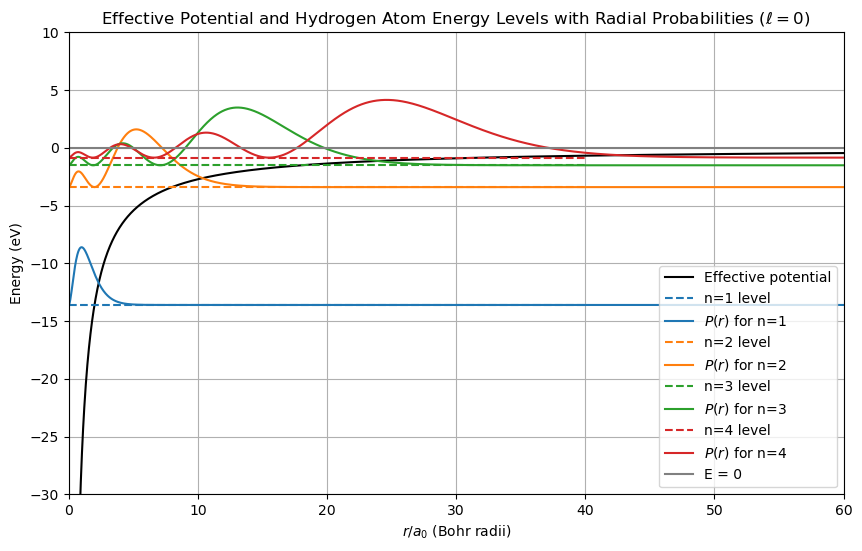

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants
from scipy.special import genlaguerre, factorial

# Constants
a0 = physical_constants["Bohr radius"][0]  # Bohr radius [m]
Eh = physical_constants["Hartree energy"][0]  # Hartree energy [J]
eV = physical_constants["electron volt"][0]  # 1 eV in J

myell = 0
nmax = 4

# General hydrogen radial wavefunction R_{n0}(r) for l=0
#def R_n0(r, n):
#    rho = 2 * r / (n * a0)
#    norm = 2.0 / (n**2 * np.sqrt(a0**3))   # normalization factor
#    return norm * np.exp(-rho/2) * genlaguerre(n-1, 1)(rho)
def R_nl(r, n, l):
    if l >= n or l < 0:
        raise ValueError("Quantum number l must satisfy 0 <= l < n")
    rho = 2 * r / (n * a0)
    norm = np.sqrt((2/(n*a0))**3 * factorial(n-l-1)/(2*n*factorial(n+l)))
    return norm * rho**l * np.exp(-rho/2) * genlaguerre(n-l-1, 2*l+1)(rho)

# Radial probability densities P(r) = r^2 |R_{n0}(r)|^2
def P_n(r, n, l):
    R = R_nl(r, n, l)
    return r**2 * np.abs(R)**2


# Energy levels in Bohr model [J]
def energy_n(n):
    return -Eh / (2 * n**2)

# Coulomb potential V(r)
def V_r(r,l):
    return -Eh * a0 / r + Eh * a0**2 * l*(l+1) / (2 * r**2)

# Prepare data
r = np.linspace(0.01*a0, 60*a0, 2000)  # radial range
V = V_r(r, myell) / eV  # in eV

# Plot
plt.figure(figsize=(10,6))
plt.plot(r/a0, V, 'k', label="Effective potential")

# Add energy levels and radial probabilities
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i, n in enumerate(range(myell+1, nmax+1)):
    E = energy_n(n)/eV
    plt.hlines(E, 0, 40, colors=colors[n-1], linestyles='--', label=f"n={n} level")
    
    # Scale radial probability to fit nicely
    P = P_n(r, n, myell)
    P_scaled = (P/np.max(P)) * 5 + E  # scale and shift to energy level
    plt.plot(r/a0, P_scaled, colors[n-1], label=f"$P(r)$ for n={n}")

# Add solid horizontal line at energy = 0
plt.axhline(0, color='gray', linewidth=1.5, label="E = 0")

plt.ylim(-30,10)
plt.xlim(0,60)
plt.xlabel(r"$r/a_0$ (Bohr radii)")
plt.ylabel("Energy (eV)")
plt.title("Effective Potential and Hydrogen Atom Energy Levels with Radial Probabilities ($\ell=0$)")
plt.legend()
plt.grid(True)
plt.show()


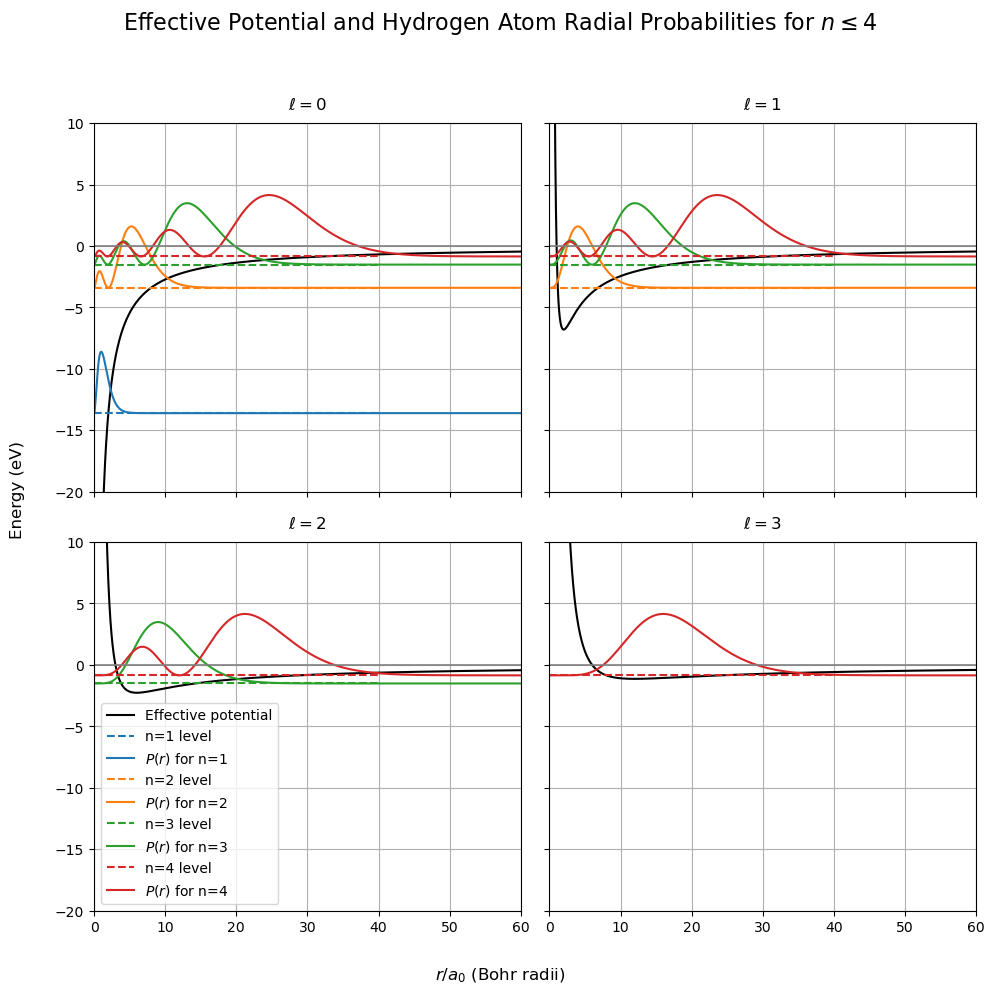

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants
from scipy.special import genlaguerre, factorial

# Constants
a0 = physical_constants["Bohr radius"][0]      # Bohr radius [m]
Eh = physical_constants["Hartree energy"][0]   # Hartree energy [J]
eV = physical_constants["electron volt"][0]    # 1 eV in J

nmax = 4

# General hydrogen radial wavefunction R_{nl}(r)
def R_nl(r, n, l):
    if l >= n or l < 0:
        raise ValueError("Quantum number l must satisfy 0 <= l < n")
    rho = 2 * r / (n * a0)
    norm = np.sqrt((2/(n*a0))**3 * factorial(n-l-1)/(2*n*factorial(n+l)))
    return norm * rho**l * np.exp(-rho/2) * genlaguerre(n-l-1, 2*l+1)(rho)

# Radial probability densities P(r) = r^2 |R_{nl}(r)|^2
def P_n(r, n, l):
    R = R_nl(r, n, l)
    return r**2 * np.abs(R)**2

# Energy levels [J]
def energy_n(n):
    return -Eh / (2 * n**2)

# Effective potential (Coulomb + centrifugal)
def V_r(r, l):
    return -Eh * a0 / r + Eh * a0**2 * l*(l+1) / (2 * r**2)

# Prepare data
r = np.linspace(0.01*a0, 60*a0, 2000)  # radial range

# Colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Set up 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

for idx, myell in enumerate(range(4)):   # l = 0,1,2,3
    ax = axes[idx]

    # Effective potential
    V = V_r(r, myell) / eV
    ax.plot(r/a0, V, 'k', label="Effective potential")

    # Energy levels + radial probabilities
    for i, n in enumerate(range(myell+1, nmax+1)):
        E = energy_n(n)/eV
        ax.hlines(E, 0, 40, colors=colors[n-1], linestyles='--', label=f"n={n} level")

        P = P_n(r, n, myell)
        P_scaled = (P/np.max(P)) * 5 + E  # scale & shift to energy level
        ax.plot(r/a0, P_scaled, colors[n-1], label=f"$P(r)$ for n={n}")

    # E=0 line
    ax.axhline(0, color='gray', linewidth=1.2)

    ax.set_xlim(0, 60)
    ax.set_ylim(-20, 10)
    ax.set_title(fr"$\ell={myell}$", pad=10)
    ax.grid(True)

# Force ticks to show up only where wanted
for ax in axes:
    ax.tick_params(labelbottom=False, labelleft=False)  # start blank

# left column: y labels
axes[0].tick_params(labelleft=True)
axes[2].tick_params(labelleft=True)

# bottom row: x labels
axes[2].tick_params(labelbottom=True)
axes[3].tick_params(labelbottom=True)

# Shared axis labels (outside the plots)
fig.text(0.5, 0.01, r"$r/a_0$ (Bohr radii)", ha="center", fontsize=12)
fig.text(0.01, 0.5, "Energy (eV)", va="center", rotation="vertical", fontsize=12)

# Legend only in bottom-left subplot
handles, labels = axes[0].get_legend_handles_labels()
axes[2].legend(handles, labels, loc="lower left", fontsize=10)

fig.suptitle("Effective Potential and Hydrogen Atom Radial Probabilities for $n\leq 4$", fontsize=16)
plt.tight_layout(rect=[0.04,0.04,1,0.95])
plt.show()


In [19]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.special import sph_harm, assoc_laguerre
from math import factorial as math_factorial
import plotly.io as pio
import json

# Constants
a0 = 1.0  # Bohr radius in arbitrary units
grid_lim = 30
grid_points = 100
x = np.linspace(-grid_lim, grid_lim, grid_points)
z = np.linspace(-grid_lim, grid_lim, grid_points)
X, Z = np.meshgrid(x, z)

# --- Wavefunctions ---
def R_nl(r, n, l):
    rho = 2 * r / (n * a0)
    norm = np.sqrt((2/(n*a0))**3 * math_factorial(n-l-1) / (2*n * math_factorial(n+l)))
    return norm * np.exp(-rho/2) * rho**l * assoc_laguerre(rho, n-l-1, 2*l+1)

def psi_nlm(x, y, z, n, l, m):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(np.divide(z, r, out=np.zeros_like(r), where=r!=0))
    phi = np.arctan2(y, x)
    R = R_nl(r, n, l)
    Y = sph_harm(m, l, phi, theta)
    return R * Y

def density_slices(n, l, m):
    Y0 = np.zeros_like(X)
    psi_xz = psi_nlm(X, Y0, Z, n, l, m)
    density_xz = np.abs(psi_xz)**2

    Y, X2 = np.meshgrid(x, x)
    Z0 = np.zeros_like(X2)
    psi_xy = psi_nlm(X2, Y, Z0, n, l, m)
    density_xy = np.abs(psi_xy)**2
    
    return density_xz, density_xy

# --- Precomputation Step ---
precomputed_densities = {}
max_n = 5
log_epsilon = 1e-10
for n in range(1, max_n + 1):
    for l in range(n):
        for m in range(-l, l + 1):
            key = f"{n},{l},{m}"
            dens_xz, dens_xy = density_slices(n, l, m)
            
            log_dens_xz = np.log10(dens_xz + log_epsilon)
            log_dens_xy = np.log10(dens_xy + log_epsilon)
            
            precomputed_densities[key] = {
                "dens_xz": dens_xz.tolist(),
                "dens_xy": dens_xy.tolist(),
                "log_dens_xz": log_dens_xz.tolist(),
                "log_dens_xy": log_dens_xy.tolist(),
                # Min/max for linear scale
                "min_xz": float(np.min(dens_xz)),
                "max_xz": float(np.max(dens_xz)),
                "min_xy": float(np.min(dens_xy)),
                "max_xy": float(np.max(dens_xy)),
                # Min/max for log scale
                "min_log_xz": float(np.min(log_dens_xz)),
                "max_log_xz": float(np.max(log_dens_xz)),
                "min_log_xy": float(np.min(log_dens_xy)),
                "max_log_xy": float(np.max(log_dens_xy)),
            }
            print(f"Precomputed state: n={n}, l={l}, m={m}")

# --- Plotly setup ---
n0, l0, m0 = 1, 0, 0
initial_densities = precomputed_densities[f"{n0},{l0},{m0}"]
density_xz_initial = initial_densities["dens_xz"]
density_xy_initial = initial_densities["dens_xy"]
log_density_xz_initial = initial_densities["log_dens_xz"]
log_density_xy_initial = initial_densities["log_dens_xy"]

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=(
                        "XZ-plane (y=0) - Linear Scale", 
                        "XY-plane (z=0) - Linear Scale",
                        "XZ-plane (y=0) - Log Scale",
                        "XY-plane (z=0) - Log Scale"
                    ))

fig.add_trace(go.Heatmap(z=density_xz_initial, x=x, y=z, colorscale="Viridis", showscale=False), row=1, col=1)
fig.add_trace(go.Heatmap(z=density_xy_initial, x=x, y=x, colorscale="Viridis", showscale=False), row=1, col=2)
fig.add_trace(go.Heatmap(z=log_density_xz_initial, x=x, y=z, colorscale="Viridis", showscale=False), row=2, col=1)
fig.add_trace(go.Heatmap(z=log_density_xy_initial, x=x, y=x, colorscale="Viridis", showscale=False), row=2, col=2)

fig.update_layout(
    title=f"Hydrogen Wavefunction |ψ|² — n={n0}, l={l0}, m={m0}",
    height=800, width=700,
)

# Enforce 1:1 aspect ratio and set the visible range
range_lim = [-grid_lim, grid_lim]
fig.update_xaxes(scaleanchor="y", scaleratio=1, row=1, col=1, range=range_lim)
fig.update_yaxes(constrain="domain", row=1, col=1, range=range_lim)
fig.update_xaxes(scaleanchor="y", scaleratio=1, row=1, col=2, range=range_lim)
fig.update_yaxes(constrain="domain", row=1, col=2, range=range_lim)
fig.update_xaxes(scaleanchor="y", scaleratio=1, row=2, col=1, range=range_lim)
fig.update_yaxes(constrain="domain", row=2, col=1, range=range_lim)
fig.update_xaxes(scaleanchor="y", scaleratio=1, row=2, col=2, range=range_lim)
fig.update_yaxes(constrain="domain", row=2, col=2, range=range_lim)

html_str = pio.to_html(fig, include_plotlyjs="cdn", full_html=True)

# Corrected JavaScript with data loaded from JSON
json_data = json.dumps(precomputed_densities)

custom_js = f"""
<style>
  .controls-grid {{
    display: grid;
    grid-template-columns: auto auto auto 1fr;
    gap: 5px;
    align-items: center;
    margin: 10px;
    font-family: sans-serif;
  }}
  .label-cell {{
    font-weight: bold;
    text-align: right;
    padding-right: 5px;
  }}
  .value-cell {{
    font-family: monospace;
    text-align: center;
    min-width: 20px;
  }}
  .button-cell {{
    display: flex;
  }}
  .button-cell button {{
    width: 25px;
  }}
</style>
<script>
document.addEventListener("DOMContentLoaded", function() {{
    var gd = document.querySelectorAll(".js-plotly-plot")[0];
    var precomputed_data = {json_data};
    var n = {n0}, l = {l0}, m = {m0};
    
    // Explicitly set the range for the axes to ensure the full plot is visible
    const range_lim = [-{grid_lim}, {grid_lim}];
    Plotly.relayout(gd, {{
        'xaxis.range': range_lim,
        'yaxis.range': range_lim,
        'xaxis2.range': range_lim,
        'yaxis2.range': range_lim,
        'xaxis3.range': range_lim,
        'yaxis3.range': range_lim,
        'xaxis4.range': range_lim,
        'yaxis4.range': range_lim,
    }});
    
    function enforceConstraints() {{
        if (n < 1) n = 1;
        if (l >= n) l = n-1;
        if (m > l) m = l;
        if (m < -l) m = -l;
    }}

    function updatePlot() {{
        var key = `${{n}},${{l}},${{m}}`;
        var data = precomputed_data[key];

        if (data) {{
            // Update linear plots (traces 0 and 1)
            Plotly.restyle(gd, {{
                'z': [data.dens_xz],
                'zmin': data.min_xz,
                'zmax': data.max_xz
            }}, [0]);
            Plotly.restyle(gd, {{
                'z': [data.dens_xy],
                'zmin': data.min_xy,
                'zmax': data.max_xy
            }}, [1]);
            
            // Update logarithmic plots (traces 2 and 3)
            Plotly.restyle(gd, {{
                'z': [data.log_dens_xz],
                'zmin': data.min_log_xz,
                'zmax': data.max_log_xz
            }}, [2]);
            Plotly.restyle(gd, {{
                'z': [data.log_dens_xy],
                'zmin': data.min_log_xy,
                'zmax': data.max_log_xy
            }}, [3]);

            // Update the main title
            Plotly.relayout(gd, {{
                title: `Hydrogen Wavefunction |ψ|² — n=${{n}}, l=${{l}}, m=${{m}}`
            }});
        }} else {{
            console.error("Data not found for state: " + key);
        }}
    }}

    var controls = document.createElement("div");
    controls.innerHTML = `
      <div class="controls-grid">
        <div class="label-cell">n=</div>
        <div class="value-cell"><span id="n_val">${{n}}</span></div>
        <div class="button-cell">
          <button id="n_minus">-</button>
          <button id="n_plus">+</button>
        </div>
        <div></div>
        
        <div class="label-cell">l=</div>
        <div class="value-cell"><span id="l_val">${{l}}</span></div>
        <div class="button-cell">
          <button id="l_minus">-</button>
          <button id="l_plus">+</button>
        </div>
        <div></div>
        
        <div class="label-cell">m=</div>
        <div class="value-cell"><span id="m_val">${{m}}</span></div>
        <div class="button-cell">
          <button id="m_minus">-</button>
          <button id="m_plus">+</button>
        </div>
        <div></div>
      </div>
    `;
    gd.parentNode.insertBefore(controls, gd);

    function refreshLabels() {{
        document.getElementById("n_val").textContent = n;
        document.getElementById("l_val").textContent = l;
        document.getElementById("m_val").textContent = m;
    }}

    document.getElementById("n_plus").onclick = () => {{ if (n < 5) {{ n++; enforceConstraints(); updatePlot(); refreshLabels(); }} }};
    document.getElementById("n_minus").onclick = () => {{ if(n>1) {{ n--; enforceConstraints(); updatePlot(); refreshLabels(); }} }};
    document.getElementById("l_plus").onclick = () => {{ if(l < n-1) {{ l++; enforceConstraints(); updatePlot(); refreshLabels(); }} }};
    document.getElementById("l_minus").onclick = () => {{ if(l>0) {{ l--; enforceConstraints(); updatePlot(); refreshLabels(); }} }};
    document.getElementById("m_plus").onclick = () => {{ if(m < l) {{ m++; enforceConstraints(); updatePlot(); refreshLabels(); }} }};
    document.getElementById("m_minus").onclick = () => {{ if(m > -l) {{ m--; enforceConstraints(); updatePlot(); refreshLabels(); }} }};
    
    // Initial plot update to ensure correct scaling on load
    updatePlot();
}});
</script>
"""

# Write the final HTML file
with open("hydrogen_wavefunctions_optimized.html", "w") as f:
    f.write(html_str.replace("</body>", custom_js + "\n</body>"))

print("HTML file 'hydrogen_wavefunctions_optimized.html' created successfully!")

Precomputed state: n=1, l=0, m=0
Precomputed state: n=2, l=0, m=0
Precomputed state: n=2, l=1, m=-1
Precomputed state: n=2, l=1, m=0
Precomputed state: n=2, l=1, m=1
Precomputed state: n=3, l=0, m=0
Precomputed state: n=3, l=1, m=-1
Precomputed state: n=3, l=1, m=0
Precomputed state: n=3, l=1, m=1
Precomputed state: n=3, l=2, m=-2
Precomputed state: n=3, l=2, m=-1
Precomputed state: n=3, l=2, m=0
Precomputed state: n=3, l=2, m=1
Precomputed state: n=3, l=2, m=2
Precomputed state: n=4, l=0, m=0
Precomputed state: n=4, l=1, m=-1
Precomputed state: n=4, l=1, m=0
Precomputed state: n=4, l=1, m=1
Precomputed state: n=4, l=2, m=-2
Precomputed state: n=4, l=2, m=-1
Precomputed state: n=4, l=2, m=0
Precomputed state: n=4, l=2, m=1
Precomputed state: n=4, l=2, m=2
Precomputed state: n=4, l=3, m=-3
Precomputed state: n=4, l=3, m=-2
Precomputed state: n=4, l=3, m=-1
Precomputed state: n=4, l=3, m=0
Precomputed state: n=4, l=3, m=1
Precomputed state: n=4, l=3, m=2
Precomputed state: n=4, l=3, m=3


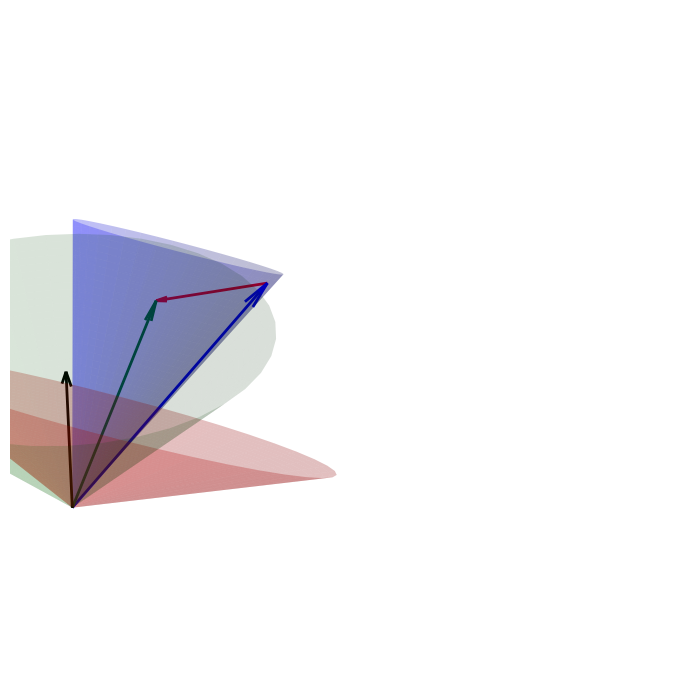

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import spatial

j=1.5
l=2
J0=[0,0,np.sqrt(j*(j+1))]
L0=[0.777, 0 , 2.324]
S0=[-0.777,0, -0.3875]

from scipy.spatial.transform import Rotation as R
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Cell In[1], line 192
    188 # Add title
    189 ax.text(5, -2.5, r'\textbf{Hydrogen Energy Levels: Bohr Model to Hyperfine Structure}', 
    190         ha='center', va='center', fontsize=14, fontweight='bold')
--> 192 plt.tight_layout()
    193 plt.show()
    195 # Optional: Save as high-quality PDF
    196 # plt.savefig('hydrogen_energy_levels.pdf', dpi=300, bbox_inches='tight')

File /opt/conda/lib/python3.11/site-packages/matplotlib/pyplot.py:2587, in tight_layout(pad, h_pad, w_pad, rect)
   2579 @_copy_docstring_and_deprecators(Figure.tight_layout)
   2580 def tight_layout(
   2581     *,
   (...)
   2585     rect: tuple[float, float, float, float] | None = None,
   2586 ) -> None:
-> 2587     gcf().tight_layout(pad=pad, h_pad=h_pad, w_pad=w_pad, rect=rect)

File /opt/conda/lib/python3.11/site-packages/matplotlib/figure.py:3540, in Figure.tight_layout(self, pad, h_pad, w_pad, rect)
   3538 previous_engine = self.get_layout_engine()
   3539 self.set_layout_engine(engine)
-> 3540 engine.execute(self)
   3541 if previous_engine is not None and not isinstancer_euler = R.from_euler('zxy', [45, -37.76, 0], degrees=True)




L = r_euler.apply(L0)
J = r_euler.apply(J0)
S = r_euler.apply(S0)


def unit(v):
    return v / np.linalg.norm(v)

# --- Plot setup ---
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")

def draw_vector(r, v, color, label):
    ax.quiver(r[0], r[1], r[2], v[0], v[1], v[2],
              color=color, lw=2, arrow_length_ratio=0.1)

# Draw vectors
draw_vector([0,0,0],L, "blue", r"$\vec L$")
draw_vector(L,S, "red", r"$\vec S$")
draw_vector([0,0,0],J, "green", r"$\vec J$")
draw_vector([0,0,0],[0,0,J[2]], "black", r"$J_z$")

# --- Precession cones ---
def plot_cone(axis, angle, height, color, alpha=0.3, resolution=40):
    axis = unit(axis)
    theta = np.linspace(0, 2*np.pi, resolution)
    z = np.linspace(0, height, resolution)
    theta, z = np.meshgrid(theta, z)
    r = z * np.tan(angle)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # rotation matrix: align z-axis to axis
    def rotation_matrix(u):
        u = unit(u)
        z = np.array([0,0,1])
        v = np.cross(z,u)
        c = np.dot(z,u)
        if np.linalg.norm(v) < 1e-10:  
            return np.eye(3)
        vx = np.array([[0, -v[2], v[1]],
                       [v[2], 0, -v[0]],
                       [-v[1], v[0], 0]])
        R = np.eye(3) + vx + vx@vx*(1/(1+c))
        return R

    R = rotation_matrix(axis)
    xyz = R @ np.vstack([x.flatten(), y.flatten(), z.flatten()])
    x_rot = xyz[0].reshape(x.shape)
    y_rot = xyz[1].reshape(y.shape)
    z_rot = xyz[2].reshape(z.shape)

    ax.plot_surface(x_rot, y_rot, z_rot, color=color, alpha=alpha, linewidth=0, shade=True)

# Cone for J around z-axis
angle_Jz = np.arccos(J[2]/np.linalg.norm(J))
plot_cone([0,0,1], angle_Jz, np.linalg.norm(J), "green", alpha=0.15)

# Cones for L and S around J
angle_LJ = np.arccos(np.dot(L,J)/(np.linalg.norm(L)*np.linalg.norm(J)))
angle_SJ = np.arccos(np.dot(S,J)/(np.linalg.norm(S)*np.linalg.norm(J)))
plot_cone(J, angle_LJ, np.linalg.norm(L), "blue", alpha=0.25)
plot_cone(J, angle_SJ, np.linalg.norm(S), "red", alpha=0.25)

# --- Aesthetics ---
ax.set_axis_off()
ax.set_xlim([0,3])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
plt.tight_layout()
plt.show()


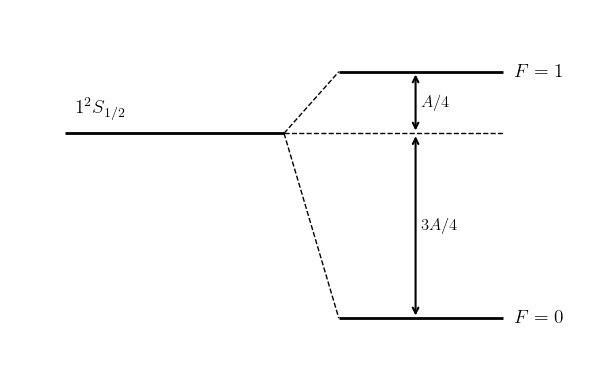

In [49]:
import matplotlib.pyplot as plt

def plot_hyperfine_splitting():
    fig, ax = plt.subplots(figsize=(6, 4))

    # --- Initial State (1S_1/2) ---
    ax.hlines(0, -2, 0, color='black', lw=2)
    ax.text(-1.9, 0.05, r'$1 ^2S_{1/2}$', va='bottom', ha='left', fontsize=14)

    # --- Dashed Line to indicate splitting ---
    ax.plot([0, 2], [0, 0], linestyle='--', color='black', lw=1)
    ax.plot([0, .5], [0, -0.75], linestyle='--', color='black', lw=1)
    ax.plot([0, .5], [0, 0.25], linestyle='--', color='black', lw=1)

    # --- Hyperfine Split States ---
    # F=0 (lower level)
    f0_energy = -0.75
    ax.hlines(f0_energy, 0.5, 2, color='black', lw=2)
    ax.text(2.1, f0_energy, r'$F=0$', va='center', ha='left', fontsize=14)

    # F=1 (upper level)
    f1_energy = 0.25
    ax.hlines(f1_energy, 0.5, 2, color='black', lw=2)
    ax.text(2.1, f1_energy, r'$F=1$', va='center', ha='left', fontsize=14)

    # --- Energy Differences (Arrows and Labels) ---
    # Arrow for 3A/4
    ax.annotate("", xy=(1.2, f0_energy), xytext=(1.2, 0),
                arrowprops=dict(arrowstyle="<->", lw=1.5, color='black'))
    ax.text(1.25, f0_energy / 2, r'$3A/4$', ha='left', va='center', fontsize=12)

    # Arrow for A/4
    ax.annotate("", xy=(1.2, 0), xytext=(1.2, f1_energy),
                arrowprops=dict(arrowstyle="<->", lw=1.5, color='black'))
    ax.text(1.25, (0 + f1_energy) / 2, r'$A/4$', ha='left', va='center', fontsize=12)


    # --- Plot Aesthetics ---
    ax.set_ylim(-1.0, 0.5) # Adjust y-limits to fit diagram
    ax.set_xlim(-2.5, 2.7) # Adjust x-limits
    ax.axis('off') # Hide axes

    plt.tight_layout()
    plt.savefig('hyperfine_splitting_matplotlib.png', dpi=300) # Save as PNG
    plt.show()

plot_hyperfine_splitting()

In [60]:
import svgwrite
import math
import random

# Create SVG drawing with an adjusted canvas height to fit all elements
# Height increased to 450px to accommodate all labels without an offset
dwg = svgwrite.Drawing('lamb_retherford_experiment_latex.svg', size=('800px', '450px'))

# Define styles
dwg.defs.add(dwg.style("""
    .bold-text { font-family: 'Arial', 'Helvetica', sans-serif; font-weight: bold; font-size: 12px; }
    .title-text { font-family: 'Arial', 'Helvetica', sans-serif; font-weight: bold; font-size: 18px; }
    .subtitle-text { font-family: 'Arial', 'Helvetica', sans-serif; font-style: italic; font-size: 14px; }
    .small-text { font-family: 'Arial', 'Helvetica', sans-serif; font-style: italic; font-size: 11px; }
    .beam-line { stroke: black; stroke-width: 3; fill: none; }
    .thin-line { stroke: black; stroke-width: 2; fill: none; }
    .structure-line { stroke: black; stroke-width: 1; opacity: 0.7; }
"""))

# Arrow marker definition - properly centered
arrow = dwg.defs.add(dwg.marker(insert=(4, 4), size=(8, 8), orient='auto'))
arrow.add(dwg.path(d="M0,0 L8,4 L0,8 L2,4 Z", fill='black'))

# 1. OVEN
oven = dwg.add(dwg.rect(insert=(50, 150), size=(80, 100), 
                        fill='#CCCCCC', stroke='black', stroke_width=2))

# H atoms dots in oven - randomly distributed
random.seed(42)  # For reproducible randomness
for i in range(80):  # More atoms, randomly placed
    x = random.uniform(55, 125)  # Random x within oven bounds
    y = random.uniform(155, 245) # Random y within oven bounds
    dwg.add(dwg.circle(center=(x, y), r=1.5, fill='black'))

# Oven label
dwg.add(dwg.text('Oven', insert=(90, 280), text_anchor='middle', class_='bold-text'))

# 2. H ATOMS BEAM FROM OVEN - single arrow from oven to tungsten detector
dwg.add(dwg.line(start=(130, 200), end=(700, 200), 
                 stroke='black', stroke_width=3, marker_end=arrow.get_funciri()))

# Labels for H beam sections
dwg.add(dwg.text('H atoms', insert=(175, 185), text_anchor='middle', class_='bold-text'))
# Replaced with LaTeX-style formatting
dwg.add(dwg.text(r'1 $S_{1/2}$', insert=(175, 220), text_anchor='middle', class_='bold-text'))

# 3. ELECTRON SOURCE (heating filament at bottom)
filament_y = 350 # Original y position
filament_path_data = f"M254,{filament_y}"
for i in range(4):
    x = 259 + i * 7
    y_val = filament_y + (5 if i % 2 == 0 else -5)
    filament_path_data += f" L{x},{y_val}"
filament_path_data += f" L285,{filament_y}"

dwg.add(dwg.path(d=filament_path_data, stroke='red', stroke_width=3, fill='none'))

# Filament supports
dwg.add(dwg.line(start=(254, filament_y), end=(254, filament_y + 10), 
                 stroke='black', stroke_width=2))
dwg.add(dwg.line(start=(285, filament_y), end=(285, filament_y + 10), 
                 stroke='black', stroke_width=2))

# ELECTRON BEAM (multiple diverging arrows from bottom to top)
v_arrow = dwg.defs.add(dwg.marker(insert=(4, 4), size=(8, 8), orient='auto'))
v_arrow.add(dwg.path(d="M0,0 L8,4 L0,8 L4,4 Z", fill='blue'))

# Create multiple slightly diverging electron beam arrows going upward
base_x = 270
for i in range(8):
    start_x = base_x + random.uniform(-1, 1)
    end_x = base_x + random.gauss(0, 6)
    
    start_y = 330 # Original y position
    end_y = 90    # Original y position
    
    dwg.add(dwg.line(start=(start_x, start_y), end=(end_x, end_y), 
                     stroke='blue', stroke_width=1.5, marker_end=v_arrow.get_funciri()))

# Electron source labels
dwg.add(dwg.text('Electron', insert=(270, 385), text_anchor='middle', class_='bold-text'))
dwg.add(dwg.text('source', insert=(270, 400), text_anchor='middle', class_='bold-text'))
dwg.add(dwg.text('(heated filament)', insert=(270, 415), text_anchor='middle', class_='small-text'))

# 4. Metastable state labels (beam continues as single arrow)
dwg.add(dwg.text('H atoms', insert=(400, 185), text_anchor='middle', class_='bold-text'))
# Replaced with LaTeX-style formatting
dwg.add(dwg.text(r'2 $S_{1/2}$', insert=(400, 220), text_anchor='middle', class_='bold-text'))

# 5. RESONATOR
resonator = dwg.add(dwg.rect(insert=(480, 120), size=(110, 160), 
                             fill='#E6F3FF', fill_opacity=0.5, 
                             stroke='black', stroke_width=2))

# Vertical lines inside resonator
for i in range(12):
    x = 490 + i*8
    dwg.add(dwg.line(start=(x, 130), end=(x, 270), class_='structure-line'))

# Resonator labels
dwg.add(dwg.text('Resonator', insert=(540, 300), text_anchor='middle', class_='bold-text'))
dwg.add(dwg.text('tunable', insert=(540, 315), text_anchor='middle', class_='bold-text'))
dwg.add(dwg.text('1 ... 10 GHz', insert=(540, 330), text_anchor='middle', class_='bold-text'))

# 6. No separate beam section needed - single arrow goes all the way to detector

# 7. TUNGSTEN FOIL DETECTOR
dwg.add(dwg.line(start=(700, 160), end=(720, 240), stroke='black', stroke_width=3))

# W foil label
dwg.add(dwg.text('W foil', insert=(710, 150), text_anchor='middle', class_='bold-text'))

# 8. DETECTION CIRCUIT
dwg.add(dwg.text('e⁻', insert=(670, 230), text_anchor='middle', class_='bold-text'))
dwg.add(dwg.line(start=(710, 203), end=(680, 240), 
                  stroke='blue', stroke_width=1.5, marker_end=v_arrow.get_funciri()))
dwg.add(dwg.line(start=(660, 245), end=(696, 245), stroke='black', stroke_width=2))


# Wires
dwg.add(dwg.line(start=(678, 245), end=(678, 280), class_='thin-line'))
dwg.add(dwg.line(start=(678, 280), end=(710, 280), class_='thin-line'))
dwg.add(dwg.line(start=(750, 280), end=(780, 280), class_='thin-line'))

dwg.add(dwg.line(start=(710, 200), end=(780, 200), class_='thin-line'))
dwg.add(dwg.line(start=(780, 200), end=(780, 320), class_='thin-line'))

# Ammeter
dwg.add(dwg.circle(center=(730, 280), r=20, fill='white', 
                   stroke='black', stroke_width=2))
dwg.add(dwg.text('A', insert=(730, 285), text_anchor='middle', 
                 font_size='14px', font_weight='bold'))

# Connect ammeter
dwg.add(dwg.line(start=(780, 280), end=(780, 270), class_='thin-line'))

# Ground symbol
dwg.add(dwg.line(start=(765, 320), end=(795, 320), class_='thin-line'))
dwg.add(dwg.line(start=(770, 325), end=(790, 325), class_='thin-line'))
dwg.add(dwg.line(start=(775, 330), end=(785, 330), class_='thin-line'))

# Save the SVG
dwg.save()
print("SVG saved as 'lamb_retherford_experiment_latex.svg'")

SVG saved as 'lamb_retherford_experiment_latex.svg'


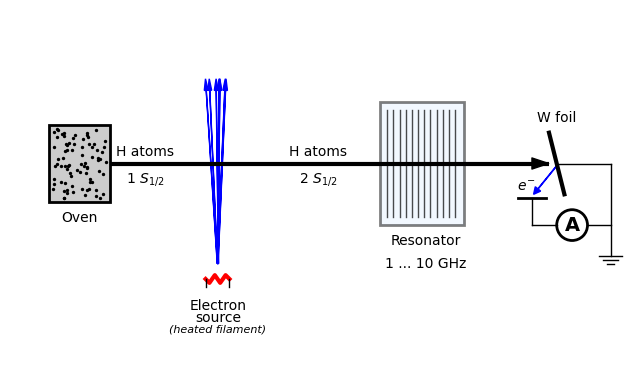

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import random
import numpy as np

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.set_xlim(0, 800)
ax.set_ylim(0, 450)
ax.invert_yaxis()  # Invert y-axis to match SVG's top-down coordinate system
ax.set_aspect('equal', adjustable='box') # Ensure correct aspect ratio

# Hide axes, ticks, and spines
ax.set_axis_off()

# Set up styles (equivalent to SVG CSS classes)
font_props_bold = {'fontfamily': 'sans-serif', 'fontsize': 10}
font_props_title = {'fontfamily': 'Arial', 'fontweight': 'bold', 'fontsize': 18}
font_props_subtitle = {'fontfamily': 'Arial', 'fontstyle': 'italic', 'fontsize': 14}
font_props_small = {'fontfamily': 'sans-serif', 'fontstyle': 'italic', 'fontsize': 8}

# 1. OVEN
oven = patches.Rectangle((50, 150), 80, 100, linewidth=2, edgecolor='black', facecolor='#CCCCCC')
ax.add_patch(oven)

# H atoms dots in oven
random.seed(42)  # For reproducible randomness
num_atoms = 80
x_atoms = [random.uniform(55, 125) for _ in range(num_atoms)]
y_atoms = [random.uniform(155, 245) for _ in range(num_atoms)]
ax.scatter(x_atoms, y_atoms, s=2, color='black') # s=8 is a good visual equivalent for r=1.5
ax.text(90, 270, 'Oven', ha='center', va='center',  **font_props_bold)

# 2. H ATOMS BEAM
ax.plot([130, 700], [200, 200], color='black', linewidth=3, solid_capstyle='butt')
ax.annotate('', xy=(700, 200), xytext=(690, 200), arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))
ax.text(175, 185, 'H atoms', ha='center', va='center', **font_props_bold)
ax.text(175, 220, r'1 $S_{1/2}$', ha='center', va='center', **font_props_bold)


## **Electron Source & Excitation**
# 3. ELECTRON SOURCE
filament_y = 350
x_filament = [254, 259, 266, 273, 280, 285]
y_filament = [filament_y, filament_y + 5, filament_y - 5, filament_y + 5, filament_y - 5, filament_y]
ax.plot(x_filament, y_filament, color='red', linewidth=3)
ax.plot([254, 254], [filament_y, filament_y + 10], color='black', linewidth=1)
ax.plot([285, 285], [filament_y, filament_y + 10], color='black', linewidth=1)

# Electron beam
#v_arrow_head = patches.FancyArrowPatch((0, 0), (0, 0), arrowstyle='-|>', mutation_scale=10, fc='blue')
for i in range(8):
    start_x = 270 + random.uniform(-1, 1)
    end_x = 270 + random.gauss(0, 6)
#    ax.annotate('', xy=(end_x, 90), xytext=(start_x, 330), 
#                 arrowprops=dict(facecolor='blue', shrink=0.05, width=0.5, headwidth=4))
    plt.arrow(
        x=270 + random.uniform(-1, 1),
        y=330,
        dx=random.gauss(0, 6),
        dy=-240,
        width=0.2, # Controls the stem width
        head_width=5,
        head_length=15,
        color='blue',
        length_includes_head=True
    )



# Electron source labels
ax.text(270, 385, 'Electron', ha='center', va='center', **font_props_bold)
ax.text(270, 400, 'source', ha='center', va='center', **font_props_bold)
ax.text(270, 415, '(heated filament)', ha='center', va='center', **font_props_small)

# 4. METASTABLE STATE LABELS
ax.text(400, 185, 'H atoms', ha='center', va='center', **font_props_bold)
ax.text(400, 220, r'2 $S_{1/2}$', ha='center', va='center', **font_props_bold)


## **Resonator & Detection**
# 5. RESONATOR
resonator = patches.Rectangle((480, 120), 110, 160, linewidth=2, edgecolor='black', facecolor='#E6F3FF', alpha=0.5)
ax.add_patch(resonator)
for i in range(12):
    x = 490 + i*8
    ax.plot([x, x], [130, 270], color='black', linewidth=1, alpha=0.7)
ax.text(540, 300, 'Resonator', ha='center', va='center', **font_props_bold)
#ax.text(540, 315, 'tunable', ha='center', va='center', **font_props_bold)
ax.text(540, 330, '1 ... 10 GHz', ha='center', va='center', **font_props_bold)

# 7. TUNGSTEN FOIL DETECTOR
ax.plot([700, 720], [160, 240], color='black', linewidth=3)
ax.text(710, 140, 'W foil', ha='center', va='center', **font_props_bold)

# 8. DETECTION CIRCUIT
ax.text(670, 230, r'$e^{-}$', ha='center', va='center', **font_props_bold)
#ax.annotate('', xy=(680, 240), xytext=(710, 203), 
#             arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=4))
ax.plot([660, 696], [245, 245], color='black', linewidth=2)

plt.arrow(
    x=710,
    y=203,
    dx=-30,
    dy=37,
    width=0.5, # Controls the stem width
    head_width=9,
    head_length=9,
    color='blue',
    length_includes_head=True
)

# Wires
ax.plot([678, 678], [245, 280], color='black', linewidth=1)
ax.plot([678, 710], [280, 280], color='black', linewidth=1)
ax.plot([750, 780], [280, 280], color='black', linewidth=1)
ax.plot([710, 780], [200, 200], color='black', linewidth=1)
ax.plot([780, 780], [200, 320], color='black', linewidth=1)

# Ammeter
ammeter = patches.Circle((730, 280), radius=20, edgecolor='black', facecolor='white', linewidth=2)
ax.add_patch(ammeter)
ax.text(730, 280, 'A', ha='center', va='center', fontweight='bold', fontsize=14)

# Ground symbol
ax.plot([765, 795], [320, 320], color='black', linewidth=1)
ax.plot([770, 790], [325, 325], color='black', linewidth=1)
ax.plot([775, 785], [330, 330], color='black', linewidth=1)

# Save the figure
plt.savefig('lamb_experiment.png', dpi=300)
plt.show()

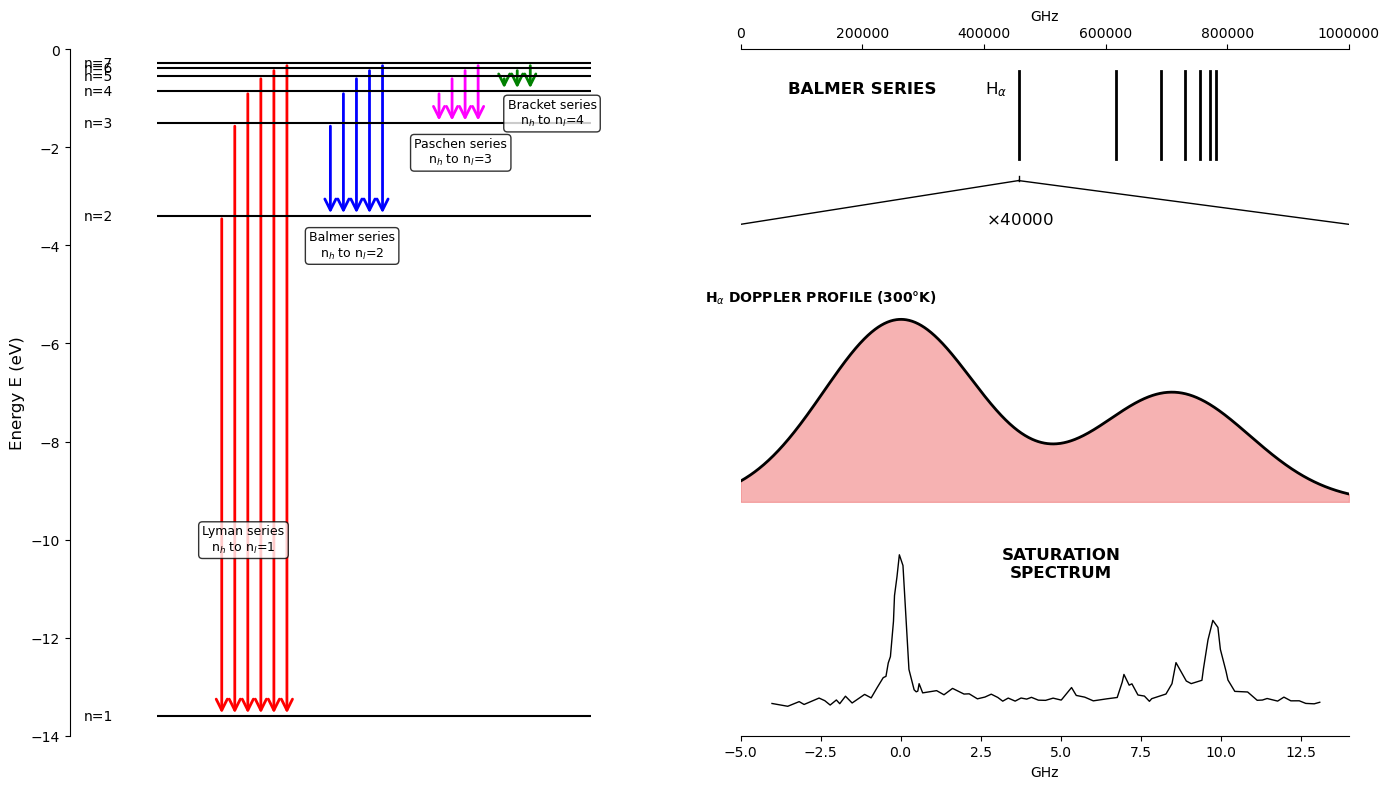

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches

# Create figure with subplots
fig = plt.figure(figsize=(14, 8))

# Left panel - Energy level diagram
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2, rowspan=3)

# Calculate energy levels (in eV)
def energy_level(n):
    return -13.6 / (n**2)

levels = [1, 2, 3, 4, 5, 6, 7]
energies = [energy_level(n) for n in levels]

# Draw horizontal lines for energy levels
for i, (level, energy) in enumerate(zip(levels, energies)):
    ax1.hlines(energy, 0, 1, colors='black', linewidth=1.5)
    ax1.text(-0.1, energy, f'n={level}', fontsize=10, ha='right', va='center')

# Draw transition arrows
# Lyman series (n_h to n_l = 1)
lyman_colors = ['red', 'red', 'red', 'red', 'red', 'red']
for i, n_upper in enumerate([2, 3, 4, 5, 6, 7]):
    x_pos = 0.15 + i * 0.03
    arrow = FancyArrowPatch((x_pos, energy_level(n_upper)), (x_pos, energy_level(1)),
                           arrowstyle='->', mutation_scale=20, 
                           color=lyman_colors[i], linewidth=2)
    ax1.add_patch(arrow)

# Balmer series (n_h to n_l = 2)
balmer_colors = ['blue', 'blue', 'blue', 'blue', 'blue']
for i, n_upper in enumerate([3, 4, 5, 6, 7]):
    x_pos = 0.4 + i * 0.03
    arrow = FancyArrowPatch((x_pos, energy_level(n_upper)), (x_pos, energy_level(2)),
                           arrowstyle='->', mutation_scale=20, 
                           color=balmer_colors[i], linewidth=2)
    ax1.add_patch(arrow)

# Paschen series (n_h to n_l = 3)
paschen_colors = ['magenta', 'magenta', 'magenta', 'magenta']
for i, n_upper in enumerate([4, 5, 6, 7]):
    x_pos = 0.65 + i * 0.03
    arrow = FancyArrowPatch((x_pos, energy_level(n_upper)), (x_pos, energy_level(3)),
                           arrowstyle='->', mutation_scale=20, 
                           color=paschen_colors[i], linewidth=2)
    ax1.add_patch(arrow)

# Bracket series (n_h to n_l = 4)
bracket_colors = ['green', 'green', 'green']
for i, n_upper in enumerate([5, 6, 7]):
    x_pos = 0.8 + i * 0.03
    arrow = FancyArrowPatch((x_pos, energy_level(n_upper)), (x_pos, energy_level(4)),
                           arrowstyle='->', mutation_scale=20, 
                           color=bracket_colors[i], linewidth=2)
    ax1.add_patch(arrow)

# Add series labels
ax1.text(0.2, -10, 'Lyman series\nn$_h$ to n$_l$=1', fontsize=9, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax1.text(0.45, -4, 'Balmer series\nn$_h$ to n$_l$=2', fontsize=9, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax1.text(0.7, -2.1, 'Paschen series\nn$_h$ to n$_l$=3', fontsize=9, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
ax1.text(0.91, -1.3, 'Bracket series\nn$_h$ to n$_l$=4', fontsize=9, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

ax1.set_xlim(-0.2, 1.2)
ax1.set_ylim(-14, 0)
ax1.set_ylabel('Energy E (eV)', fontsize=12)
ax1.set_xticks([])
# Remove the grid and frame
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#ax1.spines['left'].set_visible(False)

# Top right - Balmer series spectrum
ax2 = plt.subplot2grid((3, 4), (0, 2), colspan=2)

def balmer_energy(n):
    return 3290000 * (1/4 - 1 / ((n)**2))


for n in range(3,10):
    ax2.plot([balmer_energy(n), balmer_energy(n)], [0.5, 0.9], color='black', linewidth=2)

ax2.plot([balmer_energy(3), balmer_energy(3)], [0.4, 0.42], color='black', linewidth=1)
ax2.plot([balmer_energy(3), 0], [0.4, 0.2], color='black', linewidth=1)
ax2.plot([balmer_energy(3), 1000000], [0.4, 0.2], color='black', linewidth=1)


# Frequency scale
#freq = np.linspace(0, 500000, 1000)
# Create spectral lines at specific frequencies
#balmer_freqs = [410000, 434000, 486000, 656000]  # Approximate Balmer line frequencies
#spectrum = np.zeros_like(freq)

#for bf in balmer_freqs:
#    idx = np.argmin(np.abs(freq - bf))
#    spectrum[idx-2:idx+3] = np.exp(-0.5 * ((freq[idx-2:idx+3] - bf) / 1000)**2)

#ax2.plot(freq, spectrum, 'k-', linewidth=1)
#ax2.fill_between(freq, 0, spectrum, alpha=0.7, color='lightblue')

# Add H_α label
ax2.text(420000, 0.8, 'H$_α$', fontsize=12, ha='center')
ax2.text(200000, 0.8, 'BALMER SERIES', fontsize=12, ha='center', weight='bold')
ax2.text(460000, 0.2, r'$\times 40000$', fontsize=12, ha='center')

# Add frequency markers
#for bf in balmer_freqs:
#    ax2.axvline(bf, color='red', linestyle='--', alpha=0.7)

ax2.set_xlim(0, 1000000)
ax2.set_ylim(0, 1)
ax2.set_xlabel('GHz', fontsize=10)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
#ax2.set_xticks([0, 1000000])
#ax2.set_xticklabels(['0', '500000'])
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.ticklabel_format(style='plain') 

# Middle right - Doppler profile
ax3 = plt.subplot2grid((3, 4), (1, 2), colspan=2)

# Create Doppler profile (Gaussian)
x = np.linspace(-5, 14, 1000)
#doppler = np.exp(-0.5 * x**2)
# Add some asymmetry and additional peaks
doppler = 0.6 * np.exp(-0.5 * ((x - 8.5) / 2.4)**2)
doppler += 1 * np.exp(-0.5 * ((x + 0) / 2.4)**2)

ax3.plot(x, doppler, 'k-', linewidth=2)
ax3.fill_between(x, 0, doppler, alpha=0.6, color='lightcoral')

# Add temperature markers
#ax3.axvline(0, color='black', linestyle='-', alpha=0.5)
ax3.text(-2.5, 1.1, 'H$_α$ DOPPLER PROFILE (300°K)', fontsize=10, ha='center', weight='bold')

# Add some vertical markers
#for pos in [-1, 0.5, 1.2]:
#    ax3.axvline(pos, color='black', linestyle='-', alpha=0.7, linewidth=1)
#    ax3.text(pos, -0.1, 'T', fontsize=8, ha='center')

ax3.set_xlim(-5, 14)
ax3.set_ylim(0, 1.2)
ax3.set_yticks([])
ax3.set_xticks([])

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)



# Bottom right - Saturation spectrum (similar to the one from previous question)
ax4 = plt.subplot2grid((3, 4), (2, 2), colspan=2)

# Create frequency array
freq_sat = np.linspace(0, 10, 500)
# Create spectral data similar to the previous plot
spectrum_sat = 3 * np.ones_like(freq_sat)


x_data=[-4.0185,-3.5271,-3.1697,-3.0161,-2.5482,-2.3698,-2.2019,-2.0077,-1.9031,-1.7243,-1.516,-1.1257,-0.9213,-0.7334,-0.545,-0.459,-0.3874,-0.3199,-0.2244,-0.1925,-0.115,-0.0411,0.0719,0.2587,0.4207,0.4857,0.5349,0.5761,0.6872,1.1226,1.3528,1.6205,1.9777,2.1401,2.3965,2.6321,2.8289,3.0331,3.1877,3.3592,3.5757,3.7597,3.9362,4.0843,4.3004,4.5259,4.7611,5.0137,5.0497,5.3367,5.4837,5.7486,6.0159,6.439,6.7628,6.9196,6.973,7.136,7.2221,7.4106,7.6122,7.7686,7.8406,8.2856,8.4735,8.5985,8.9208,9.0741,9.4081,9.4568,9.5976,9.7495,9.908,9.9843,10.1607,10.2212,10.4351,10.8363,11.1341,11.2965,11.4449,11.7734,11.9689,12.1861,12.4489,12.6522,12.9156,13.0889]
y_data=[16.206,14.8,17.135,15.71,18.933,17.62,15.424,17.971,16.102,19.861,16.454,20.776,19.023,24.215,29.187,29.853,36.583,39.784,57.54,70.441,79.928,90.957,85.561,33.311,23.066,22.077,22.411,26.162,21.537,22.664,20.582,23.794,20.947,21.066,18.544,19.439,20.884,19.241,17.375,18.928,17.397,18.95,18.409,19.299,17.878,17.78,18.895,17.917,18.58,24.219,20.258,19.391,17.531,18.547,19.226,26.953,30.814,25.421,26.087,20.475,19.935,17.297,18.624,20.964,26.156,36.747,27.504,26.189,27.862,33.708,48.159,57.98,54.46,43.439,32.423,28.017,22.295,21.987,17.813,17.933,18.713,17.408,19.403,17.541,17.555,16.243,16.037,16.819]


# Main peak around 2.3 GHz
main_peak = 100 * np.exp(-0.5 * ((freq_sat - 2.3) / 0.15)**2)
spectrum_sat += main_peak

# Secondary peaks
peak2 = 65 * np.exp(-0.5 * ((freq_sat - 7.2) / 0.2)**2)
spectrum_sat += peak2

peak3 = 40 * np.exp(-0.5 * ((freq_sat - 8.3) / 0.15)**2)
spectrum_sat += peak3

# Small peak around 9.4 GHz
peak4 = 25 * np.exp(-0.5 * ((freq_sat - 9.4) / 0.1)**2)
spectrum_sat += peak4

# Add some noise
noise = 2 * np.random.normal(0, 0.5, len(freq_sat))
spectrum_sat += noise

#ax4.plot(freq_sat, spectrum_sat, 'k-', linewidth=1)
ax4.plot(x_data, y_data, 'k-', linewidth=1)
ax4.text(5, 80, 'SATURATION\nSPECTRUM', fontsize=12, ha='center', weight='bold')

# Add Lamb shift label
#ax4.annotate('LAMB SHIFT', xy=(8.5, 45), xytext=(6, 60),
#            arrowprops=dict(arrowstyle='->', lw=1.5),
#            fontsize=10, ha='center')

ax4.set_xlim(-5, 14)
ax4.set_ylim(0, 110)
ax4.set_xlabel('GHz', fontsize=10)
#ax4.set_xticks([0, 10])
#ax4.set_xticklabels(['0', '10'])
ax4.set_yticks([])

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
#ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)


# Add dashed line connecting the diagrams
#fig.add_artist(plt.Line2D([0.48, 0.52], [0.5, 0.5], linestyle='--', color='gray', alpha=0.7, transform=fig.transFigure))

plt.tight_layout()
plt.show()

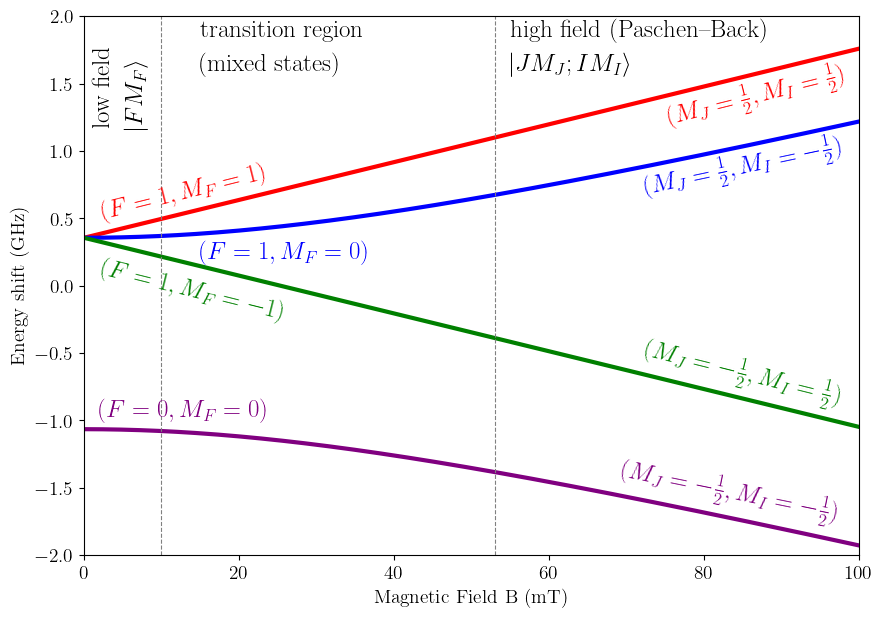

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Set the global font size
plt.rcParams['font.size'] = 14

# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True

# Optionally, configure the font family to match your LaTeX document
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

# Example LaTeX preambles can be set for more advanced customization
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{physics}'

# --- Physical Constants (in SI units) ---
h = 6.62607015e-34  # Planck's constant (J·s)
mu_B = 9.2740100783e-24  # Bohr magneton (J/T)
g_J = 2.00231930436256  # Electron g-factor
g_I_proton = 5.585694702  # Proton g-factor

# --- Hydrogen Ground State Parameters ---
delta_E_hz = 1420.405751768e6  # Hyperfine splitting frequency (Hz)
delta_E_joules = h * delta_E_hz  # Hyperfine splitting energy (Joules)
I = 0.5  # Nuclear spin for Hydrogen

# --- Magnetic Field Range (Tesla) ---
B_field = np.linspace(0, 0.2, 500)  # From 0 to 0.2 Tesla

# --- Breit-Rabi Parameter 'x' ---
# The parameter x is defined as: x = (g_J * mu_B - g_I * mu_N) * B / delta_E
# Often, the g_I*mu_N term is neglected as it's much smaller, but let's use the full expression
# x = (g_J * mu_B * B_field) / delta_E_joules
# A more common form of x uses the total magnetic moments to be more accurate
x = (g_J*mu_B + g_I_proton*mu_B/1836.15) * B_field / delta_E_joules

# --- Breit-Rabi Formula Calculation ---
# For I = 1/2 and S = 1/2, the states are F=1, F=0
# The formula is E = -delta_E / 4 +- delta_E/2 * sqrt(1 + 2*mF*x + x^2)
# The '+' is for F=1, the '-' is for F=0, but this is only for the mF=0 states.
# We must use the general formula from the beginning.
# The general Breit-Rabi formula is:
# E_mF = -(delta_E/2) * (1/(2I+1)) +- (delta_E/2)*sqrt(1+x^2 + 4mF*x) for I=1/2

# Let's use the full formula for the four energy levels
# F=1, m_F=+1 state:
E1_plus1 = +delta_E_joules/4 + (delta_E_joules/2)*x

# F=1, m_F=0 state:
E1_0 = -delta_E_joules/4 + (delta_E_joules/2)*np.sqrt(1 + x**2)

# F=0, m_F=0 state:
E0_0 = -delta_E_joules/4 - (delta_E_joules/2)*np.sqrt(1 + x**2)

# F=1, m_F=-1 state:
E1_minus1 = delta_E_joules/4 - (delta_E_joules/2)*x

# --- Plotting ---
plt.figure(figsize=(10, 7))

# Plot the energy levels, converting to GHz for the y-axis
plt.plot(B_field * 1000, E1_plus1 / h / 1e9, label=r'$F=1, m_F=+1$', color='red', linewidth=3)
plt.plot(B_field * 1000, E1_0 / h / 1e9, label=r'$F=1, m_F=0$', color='blue', linewidth=3)
plt.plot(B_field * 1000, E0_0 / h / 1e9, label=r'$F=0, m_F=0$', color='purple', linewidth=3)
plt.plot(B_field * 1000, E1_minus1 / h / 1e9, label=r'$F=1, m_F=-1$', color='green', linewidth=3)

plt.text(75, 1.2, r'$(M_J=\tfrac{1}{2},M_I=\tfrac{1}{2})$', fontsize=18, color='red', rotation=14)
plt.text(72, 0.68, r'$(M_J=\tfrac{1}{2},M_I=-\tfrac{1}{2})$', fontsize=18, color='blue', rotation=12)
plt.text(72, -0.88, r'$(M_J=-\tfrac{1}{2},M_I=\tfrac{1}{2})$', fontsize=18, color='green', rotation=-14)
plt.text(69, -1.74, r'$(M_J=-\tfrac{1}{2},M_I=-\tfrac{1}{2})$', fontsize=18, color='purple', rotation=-11.5)

plt.text(2, 0.5, r'$(F=1,M_F=1)$', fontsize=18, color='red', rotation=14)
plt.text(15, 0.2, r'$(F=1,M_F=0)$', fontsize=18, color='blue', rotation=0)
plt.text(2, -0.25, r'$(F=1,M_F=-1)$', fontsize=18, color='green', rotation=-14)
plt.text(2, -0.97, r'$(F=0,M_F=0)$', fontsize=18, color='purple', rotation=0)

plt.axvline(x=10 , color='gray', linestyle='--', linewidth=0.8,
            label=r'low field region')
plt.axvline(x=53 , color='gray', linestyle='--', linewidth=0.8,
            label=r'high field region')

plt.text(1, 1.2, r'low field', fontsize=18, rotation=90)
plt.text(5, 1.2, r'$\ket{F M_F}$', fontsize=18, rotation=90)

plt.text(15, 1.85, r'transition region', fontsize=18)
plt.text(15, 1.6, r'(mixed states)', fontsize=18)



plt.text(55, 1.85, r'high field (Paschen--Back)', fontsize=18)
plt.text(55, 1.6, r'$\ket{J M_J; I M_I}$', fontsize=18)



plt.xlabel('Magnetic Field B (mT)')
plt.ylabel('Energy shift (GHz)')
plt.grid(False)
#plt.legend()
plt.xlim(0, 100.0)
plt.ylim(-2.0, 2.0)
plt.show()

Example 1: Exponential decay from 2p to 1s state
c₂(0) = 1, c₁(0) = 0, τ = 10 × oscillation period
Decay parameters:
Oscillation period = 16.76 a.u.
Decay time constant τ = 167.55 a.u.
Initial conditions: c₁(0) = 0.000, c₂(0) = 1.000
After 1τ: c₁ = 0.930, c₂ = 0.368
After 2τ: c₁ = 0.991, c₂ = 0.135


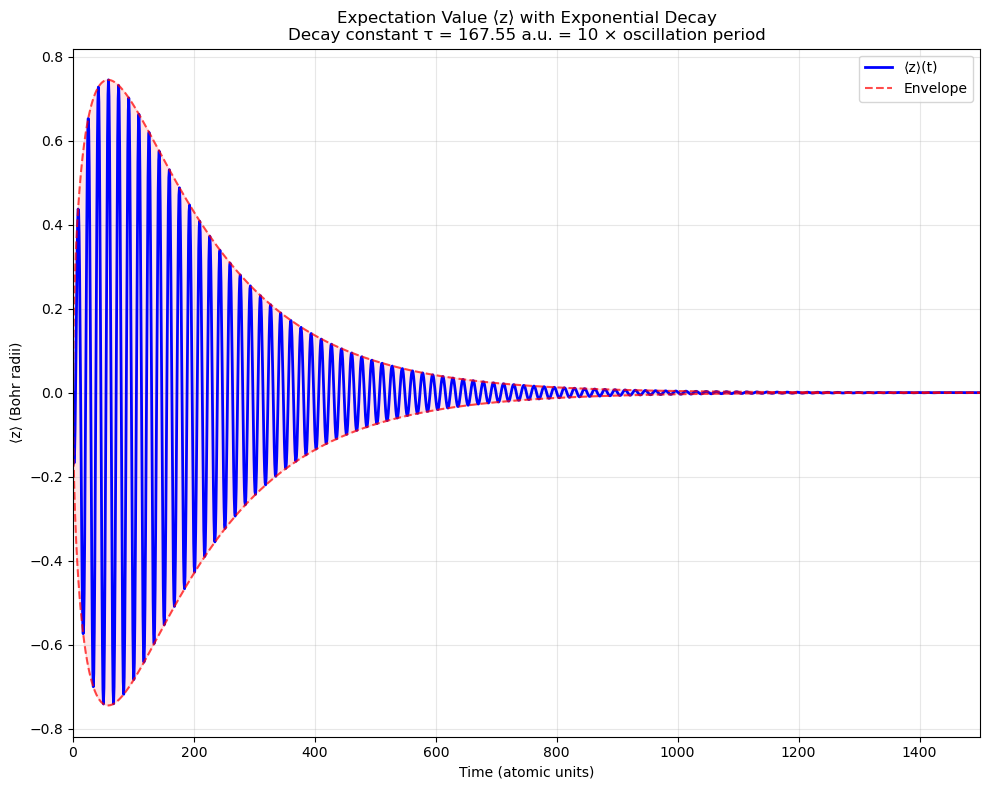


Example 2: Phase space trajectory


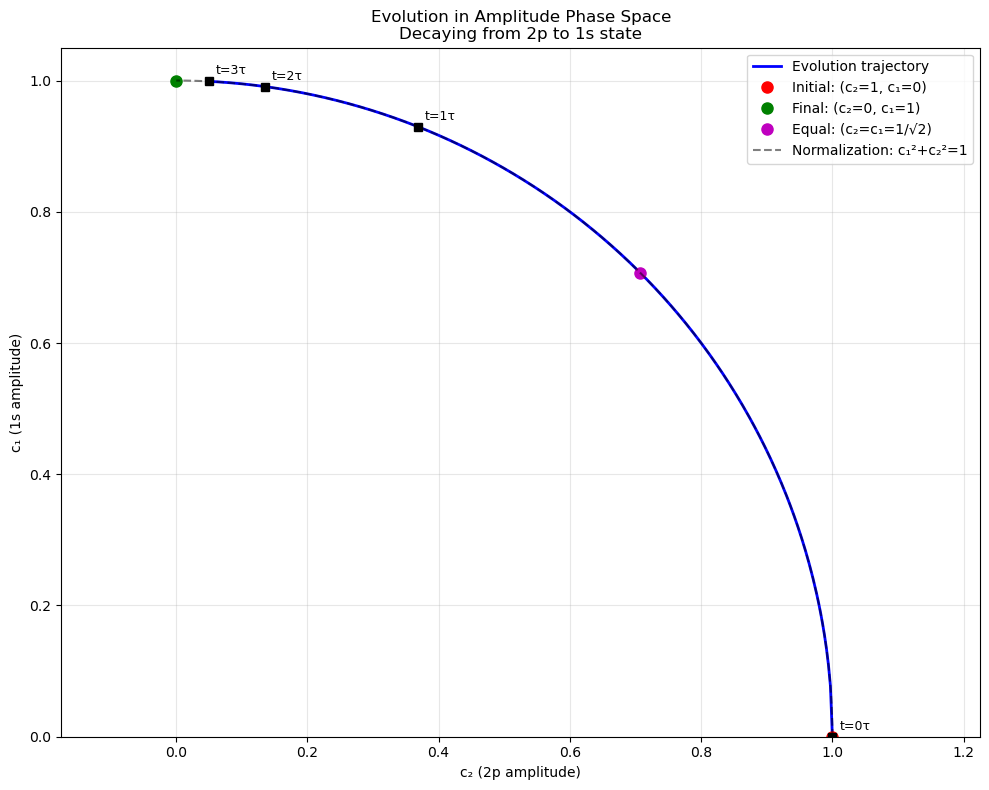


Example 3: Effect of different decay rates


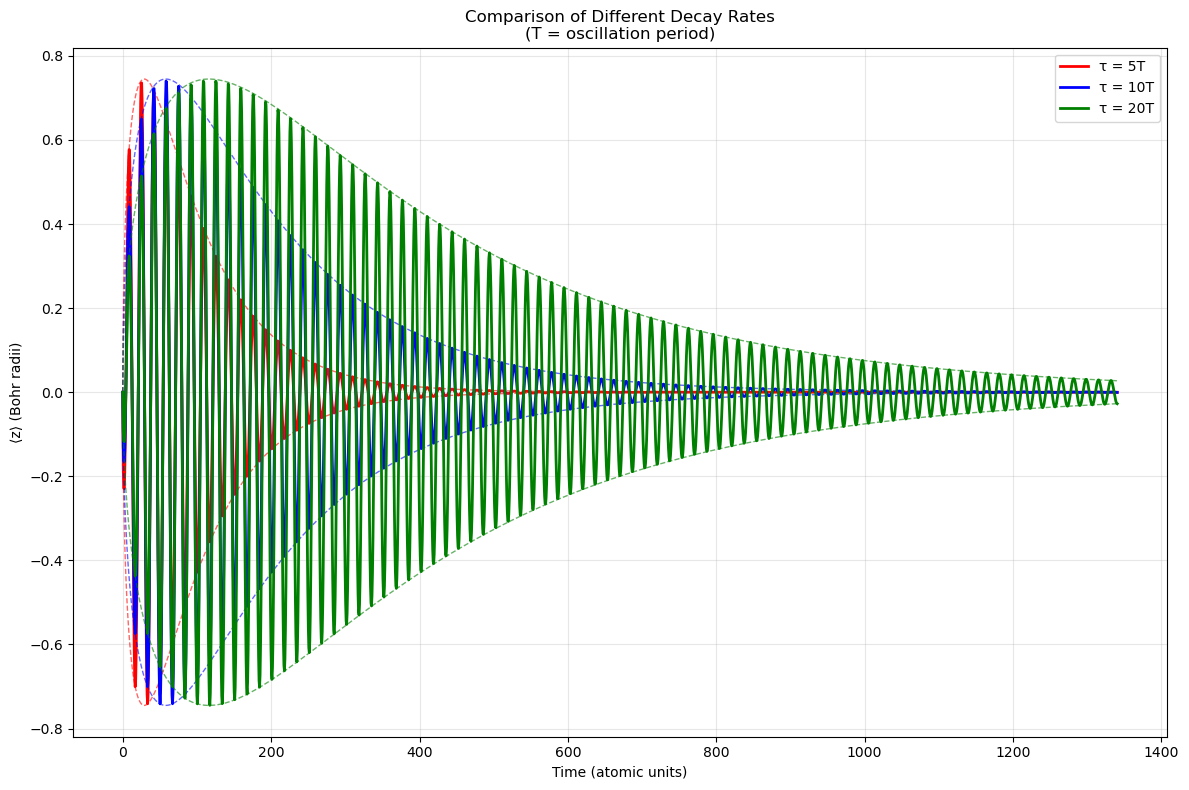


Key physics of decaying superposition:
- System starts in pure 2p state: c₁(0)=0, c₂(0)=1
- 2p amplitude decays exponentially: c₂(t) = exp(-t/τ)
- 1s amplitude grows to maintain normalization: c₁(t) = √(1-c₂²)
- Oscillation amplitude ∝ c₁(t)c₂(t) → peaks then decays
- System asymptotically approaches pure 1s state
- Physical interpretation: spontaneous emission or decoherence


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import tplquad

def hydrogen_1s_wavefunction(r, theta, phi):
    """
    Hydrogen 1s wavefunction in spherical coordinates
    ψ₁₀₀ = R₁₀(r) * Y₀⁰(θ,φ)
    """
    # Radial part R₁₀(r) = 2 * exp(-r)
    R10 = 2 * np.exp(-r)
    
    # Angular part Y₀⁰(θ,φ) = 1/√(4π)
    Y00 = 1/np.sqrt(4*np.pi)
    
    return R10 * Y00

def hydrogen_2p_m0_wavefunction(r, theta, phi):
    """
    Hydrogen 2p (m=0) wavefunction in spherical coordinates
    ψ₂₁₀ = R₂₁(r) * Y₁⁰(θ,φ)
    """
    # Radial part R₂₁(r) = (1/(2√6)) * r * exp(-r/2)
    R21 = (1/(2*np.sqrt(6))) * r * np.exp(-r/2)
    
    # Angular part Y₁⁰(θ,φ) = √(3/4π) * cos(θ)
    Y10 = np.sqrt(3/(4*np.pi)) * np.cos(theta)
    
    return R21 * Y10

def superposition_wavefunction(r, theta, phi, c1, c2, t):
    """
    Superposition wavefunction: ψ(t) = c1*ψ₁₀₀*exp(-iE₁t/ℏ) + c2*ψ₂₁₀*exp(-iE₂t/ℏ)
    
    Parameters:
    r, theta, phi: spherical coordinates
    c1, c2: amplitudes (normalized: c1²+c2²=1)
    t: time (in atomic units where ℏ = 1)
    """
    # Energy levels (in atomic units: E_n = -1/(2n²))
    E1 = -1/2  # 1s energy
    E2 = -1/8  # 2p energy
    
    # Time-dependent phase factors
    phase1 = np.exp(-1j * E1 * t)  # ℏ = 1 in atomic units
    phase2 = np.exp(-1j * E2 * t)
    
    # Individual wavefunctions
    psi_1s = hydrogen_1s_wavefunction(r, theta, phi)
    psi_2p = hydrogen_2p_m0_wavefunction(r, theta, phi)
    
    # Superposition
    psi_total = c1 * psi_1s * phase1 + c2 * psi_2p * phase2
    
    return psi_total

def time_dependent_amplitudes(t, tau):
    """
    Time-dependent amplitudes with exponential decay
    c2(t) = exp(-t/tau), c1(t) = sqrt(1 - c2(t)²)
    
    Parameters:
    t: time
    tau: decay time constant
    """
    c2_t = np.exp(-t / tau)
    c1_t = np.sqrt(1 - c2_t**2)
    
    return c1_t, c2_t

def expectation_z_with_decay(t, tau):
    """
    Expectation value of z with time-dependent decay
    """
    # Get time-dependent amplitudes
    c1_t, c2_t = time_dependent_amplitudes(t, tau)
    
    # Energy levels (atomic units)
    E1 = -1/2  # 1s energy
    E2 = -1/8  # 2p energy
    
    # Transition frequency
    omega_21 = (E2 - E1)  # = 3/8
    
    # Matrix element
    matrix_element_1s_2p = -128 * np.sqrt(2) / (3**5)
    
    # Expectation value with time-dependent amplitudes
    expectation_z = 2 * c1_t * c2_t * matrix_element_1s_2p * np.cos(omega_21 * t)
    
    return expectation_z

def expectation_z_analytical(c1, c2, t):
    """
    Expectation value of z with time-dependent decay
    """
    # Get time-dependent amplitudes
    c1_t, c2_t = time_dependent_amplitudes(t, tau)
    
    # Energy levels (atomic units)
    E1 = -1/2  # 1s energy
    E2 = -1/8  # 2p energy
    
    # Transition frequency
    omega_21 = (E2 - E1)  # = 3/8
    
    # Matrix element
    matrix_element_1s_2p = -128 * np.sqrt(2) / (3**5)
    
    # Expectation value with time-dependent amplitudes
    expectation_z = 2 * c1_t * c2_t * matrix_element_1s_2p * np.cos(omega_21 * t)
    
    return expectation_z

def plot_decaying_oscillation():
    """
    Plot ⟨z⟩ with exponential decay of c2
    """
    # Calculate decay time constant (10 times oscillation period)
    omega_21 = 3/8
    period = 2*np.pi / omega_21
    tau = 10 * period  # Decay time constant
    
    # Time array
    t_max = 10 * tau  # Show 5 decay constants
    t = np.linspace(0, t_max, 2000)
    
    # Calculate expectation values
    z_exp_decay = expectation_z_with_decay(t, tau)
    
    # Get time-dependent amplitudes for plotting
    c1_t, c2_t = time_dependent_amplitudes(t, tau)
    
    # Create comprehensive plot
    #fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    plt.figure(figsize=(10, 8))
    
    # Plot 1: Expectation value with decay
    plt.plot(t, z_exp_decay, 'b-', linewidth=2, label='⟨z⟩(t)')
    
    # Add envelope (decay of amplitude)
    matrix_element = -128 * np.sqrt(2) / (3**5)
    envelope_upper = 2 * c1_t * c2_t * abs(matrix_element)
    envelope_lower = -envelope_upper
    
    plt.plot(t, envelope_upper, 'r--', alpha=0.7, linewidth=1.5, label='Envelope')
    plt.plot(t, envelope_lower, 'r--', alpha=0.7, linewidth=1.5)
    plt.fill_between(t, envelope_lower, envelope_upper, alpha=0.1, color='red')
    
    plt.xlabel('Time (atomic units)')
    plt.ylabel('⟨z⟩ (Bohr radii)')
    plt.title(f'Expectation Value ⟨z⟩ with Exponential Decay\nDecay constant τ = {tau:.2f} a.u. = 10 × oscillation period')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1500)
    plt.legend()
    
    # Plot 2: Time-dependent amplitudes
    # axes[1].plot(t, c1_t, 'g-', linewidth=2, label='c₁(t) = √(1-c₂²)')
    # axes[1].plot(t, c2_t, 'orange', linewidth=2, label='c₂(t) = exp(-t/τ)')
    # axes[1].axhline(y=1/np.sqrt(2), color='gray', linestyle=':', alpha=0.7, label='1/√2')
    
    # axes[1].set_xlabel('Time (atomic units)')
    # axes[1].set_ylabel('Amplitude')
    # axes[1].set_title('Time-Dependent Superposition Coefficients')
    # axes[1].grid(True, alpha=0.3)
    # axes[1].legend()
    # axes[1].set_ylim(0, 1.05)
    
    # # Plot 3: Instantaneous oscillation amplitude
    # inst_amplitude = 2 * c1_t * c2_t * abs(matrix_element)
    
    # axes[2].plot(t, inst_amplitude, 'purple', linewidth=2, label='2|c₁(t)c₂(t)||⟨1s|z|2p⟩|')
    # axes[2].set_xlabel('Time (atomic units)')
    # axes[2].set_ylabel('Oscillation Amplitude (Bohr radii)')
    # axes[2].set_title('Instantaneous Amplitude of ⟨z⟩ Oscillation')
    # axes[2].grid(True, alpha=0.3)
    # axes[2].legend()
    
    plt.tight_layout()
    
    # Print key information
    print(f"Decay parameters:")
    print(f"Oscillation period = {period:.2f} a.u.")
    print(f"Decay time constant τ = {tau:.2f} a.u.")
    print(f"Initial conditions: c₁(0) = {c1_t[0]:.3f}, c₂(0) = {c2_t[0]:.3f}")
    print(f"After 1τ: c₁ = {np.sqrt(1-np.exp(-2)):.3f}, c₂ = {np.exp(-1):.3f}")
    print(f"After 2τ: c₁ = {np.sqrt(1-np.exp(-4)):.3f}, c₂ = {np.exp(-2):.3f}")
    
    return fig

def plot_phase_space_evolution():
    """
    Plot the evolution in c1-c2 phase space
    """
    # Parameters
    omega_21 = 3/8
    period = 2*np.pi / omega_21
    tau = 10 * period
    
    t = np.linspace(0, 3*tau, 1000)
    c1_t, c2_t = time_dependent_amplitudes(t, tau)
    
    plt.figure(figsize=(10, 8))
    
    # Plot trajectory in c1-c2 space
    plt.plot(c2_t, c1_t, 'b-', linewidth=2, label='Evolution trajectory')
    
    # Mark special points
    plt.plot(1, 0, 'ro', markersize=8, label='Initial: (c₂=1, c₁=0)')
    plt.plot(0, 1, 'go', markersize=8, label='Final: (c₂=0, c₁=1)')
    plt.plot(1/np.sqrt(2), 1/np.sqrt(2), 'mo', markersize=8, label='Equal: (c₂=c₁=1/√2)')
    
    # Add unit circle (normalization constraint)
    theta = np.linspace(0, np.pi/2, 100)
    plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5, label='Normalization: c₁²+c₂²=1')
    
    # Add time markers
    time_markers = [0, tau, 2*tau, 3*tau]
    for i, tm in enumerate(time_markers):
        idx = int(tm / (3*tau) * (len(t)-1))
        if idx < len(t):
            plt.plot(c2_t[idx], c1_t[idx], 'ks', markersize=6)
            plt.annotate(f't={tm/tau:.0f}τ', (c2_t[idx], c1_t[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.xlabel('c₂ (2p amplitude)')
    plt.ylabel('c₁ (1s amplitude)')
    plt.title('Evolution in Amplitude Phase Space\nDecaying from 2p to 1s state')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    
    plt.tight_layout()
    
    return plt.gcf()

def compare_decay_rates():
    """
    Compare different decay rates
    """
    omega_21 = 3/8
    period = 2*np.pi / omega_21
    
    # Different decay constants
    tau_values = [5*period, 10*period, 20*period]
    colors = ['red', 'blue', 'green']
    labels = ['τ = 5T', 'τ = 10T', 'τ = 20T']
    
    t_max = 4 * max(tau_values)
    t = np.linspace(0, t_max, 2000)
    
    plt.figure(figsize=(12, 8))
    
    for tau, color, label in zip(tau_values, colors, labels):
        z_exp = expectation_z_with_decay(t, tau)
        plt.plot(t, z_exp, color=color, linewidth=2, label=label)
        
        # Add envelope
        c1_t, c2_t = time_dependent_amplitudes(t, tau)
        matrix_element = -128 * np.sqrt(2) / (3**5)
        envelope = 2 * c1_t * c2_t * abs(matrix_element)
        plt.plot(t, envelope, '--', color=color, alpha=0.6, linewidth=1)
        plt.plot(t, -envelope, '--', color=color, alpha=0.6, linewidth=1)
    
    plt.xlabel('Time (atomic units)')
    plt.ylabel('⟨z⟩ (Bohr radii)')
    plt.title('Comparison of Different Decay Rates\n(T = oscillation period)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    
    return plt.gcf()
    """
    Analytical calculation of ⟨z⟩ for 1s-2p(m=0) superposition
    
    The key insight is that:
    - ⟨1s|z|1s⟩ = 0 (spherically symmetric)
    - ⟨2p|z|2p⟩ = 0 (symmetric about xy-plane)
    - ⟨1s|z|2p⟩ ≠ 0 (cross term gives oscillation)
    """
    # Energy levels (atomic units)
    E1 = -1/2  # 1s energy
    E2 = -1/8  # 2p energy
    
    # Transition frequency
    omega_21 = (E2 - E1)  # = -1/8 - (-1/2) = 3/8
    
    # The cross-term matrix element ⟨1s|z|2p⟩
    # This can be calculated analytically: ⟨1s|z|2p_m=0⟩ = -128√2/(3⁵)
    matrix_element_1s_2p = -128 * np.sqrt(2) / (3**5)  # ≈ -0.7448
    
    # Expectation value: ⟨z⟩ = 2*Re[c1*c2* * ⟨1s|z|2p⟩ * exp(-iωt)]
    expectation_z = 2 * c1 * c2 * matrix_element_1s_2p * np.cos(omega_21 * t)
    
    return expectation_z

def expectation_z_numerical(c1, c2, t, r_max=20, n_points=50):
    """
    Numerical calculation of ⟨z⟩ using integration
    This is slower but more general
    """
    def integrand(phi, theta, r):
        # Convert to Cartesian z-coordinate
        z = r * np.cos(theta)
        
        # Get the wavefunction
        psi = superposition_wavefunction(r, theta, phi, c1, c2, t)
        
        # Calculate |ψ|² * z * r² sin(θ) (volume element)
        return np.real(np.conj(psi) * z * psi) * r**2 * np.sin(theta)
    
    # Integration limits: phi[0,2π], theta[0,π], r[0,r_max]
    result, _ = tplquad(integrand, 0, r_max, 0, np.pi, 0, 2*np.pi)
    
    return result

def plot_expectation_z_vs_time(c1, c2, t_max=50, n_points=1000):
    """
    Plot ⟨z⟩ as a function of time for given amplitudes
    """
    t = np.linspace(0, t_max, n_points)
    z_exp_analytical = expectation_z_analytical(c1, c2, t)
    
    plt.figure(figsize=(12, 8))
    
    # Plot analytical result
    plt.subplot(2, 1, 1)
    plt.plot(t, z_exp_analytical, 'b-', linewidth=2, label='Analytical')
    plt.xlabel('Time (atomic units)')
    plt.ylabel('⟨z⟩ (Bohr radii)')
    plt.title(f'Expectation Value of z vs Time\nc₁ = {c1:.3f}, c₂ = {c2:.3f}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Plot frequency analysis
    plt.subplot(2, 1, 2)
    
    # Calculate several numerical points for comparison (fewer due to computational cost)
    t_numerical = np.linspace(0, t_max, 20)
    z_exp_numerical = []
    
    print("Calculating numerical values (this may take a moment)...")
    for i, ti in enumerate(t_numerical):
        if i % 5 == 0:
            print(f"Progress: {i+1}/{len(t_numerical)}")
        z_num = expectation_z_numerical(c1, c2, ti)
        z_exp_numerical.append(z_num)
    
    plt.plot(t, z_exp_analytical, 'b-', linewidth=2, label='Analytical')
    plt.plot(t_numerical, z_exp_numerical, 'ro', markersize=6, label='Numerical')
    plt.xlabel('Time (atomic units)')
    plt.ylabel('⟨z⟩ (Bohr radii)')
    plt.title('Comparison: Analytical vs Numerical')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    
    # Print key information
    omega_21 = 3/8
    period = 2*np.pi / omega_21
    amplitude = 2 * c1 * c2 * (-128 * np.sqrt(2) / (3**5))
    
    print(f"\nKey parameters:")
    print(f"Transition frequency ω₂₁ = {omega_21:.4f} atomic units")
    print(f"Oscillation period = {period:.2f} atomic units")
    print(f"Amplitude = {amplitude:.4f} Bohr radii")
    print(f"Matrix element ⟨1s|z|2p⟩ = {-128 * np.sqrt(2) / (3**5):.4f}")

def plot_expectation_vs_amplitudes():
    """
    Plot how the amplitude of oscillation depends on c1 and c2
    """
    # Create grid of c1, c2 values (normalized)
    c1_values = np.linspace(0, 1, 100)
    c2_values = np.sqrt(1 - c1_values**2)  # Normalization constraint
    
    # Calculate amplitude for each combination
    matrix_element = -128 * np.sqrt(2) / (3**5)
    amplitudes = 2 * c1_values * c2_values * abs(matrix_element)
    
    plt.figure(figsize=(10, 6))
    plt.plot(c1_values, amplitudes, 'b-', linewidth=2)
    plt.xlabel('c₁ (amplitude of 1s state)')
    plt.ylabel('Oscillation Amplitude (Bohr radii)')
    plt.title('Amplitude of ⟨z⟩ Oscillation vs Superposition Coefficients')
    plt.grid(True, alpha=0.3)
    
    # Mark maximum
    max_idx = np.argmax(amplitudes)
    plt.plot(c1_values[max_idx], amplitudes[max_idx], 'ro', markersize=8)
    plt.text(c1_values[max_idx], amplitudes[max_idx] + 0.01, 
             f'Max at c₁=c₂=1/√2\n({c1_values[max_idx]:.3f})', 
             ha='center', fontsize=10)
    
    plt.tight_layout()
    
    print(f"Maximum oscillation amplitude: {np.max(amplitudes):.4f} Bohr radii")
    print(f"Occurs when c₁ = c₂ = 1/√2 ≈ {1/np.sqrt(2):.3f}")

# Example usage
if __name__ == "__main__":
    # Example 1: Decaying oscillation
    print("Example 1: Exponential decay from 2p to 1s state")
    print("c₂(0) = 1, c₁(0) = 0, τ = 10 × oscillation period")
    plot_decaying_oscillation()
    plt.show()
    
    # Example 2: Phase space evolution
    print("\nExample 2: Phase space trajectory")
    plot_phase_space_evolution()
    plt.show()
    
    # Example 3: Comparison of decay rates
    print("\nExample 3: Effect of different decay rates")
    compare_decay_rates()
    plt.show()
    
    print("\nKey physics of decaying superposition:")
    print("- System starts in pure 2p state: c₁(0)=0, c₂(0)=1")
    print("- 2p amplitude decays exponentially: c₂(t) = exp(-t/τ)")
    print("- 1s amplitude grows to maintain normalization: c₁(t) = √(1-c₂²)")
    print("- Oscillation amplitude ∝ c₁(t)c₂(t) → peaks then decays")
    print("- System asymptotically approaches pure 1s state")
    print("- Physical interpretation: spontaneous emission or decoherence")